<a href="https://colab.research.google.com/github/jg4159/practice_space/blob/master/Split_probe_visualization_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Mount Google Drive (You don't need to run this if you are running notebooks on your laptop)

from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
from pathlib import Path
# Change this to where you put your files
DATA = Path("/content/drive/My Drive/BMI_probe_pair_design/split_probes/Jiacheng")

In [ ]:
import pandas as pd
transcript_df = pd.read_csv(DATA/'20230712_transcript_df.csv', index_col=0) #
transcript_df.insert(3, "length", [len(x) for x in transcript_df.sequence.values])
transcript_df

,gene_name,ensembl_id,sequence,length,seq_length,n_pairs,filtered_pairs,output_pairs
CDKN1A,CDKN1A,ENST00000244741,GAGGTGTGAGCAGCTGCCGAAGTCAGTTCCTTGTGGAGCCGGAGCT...,2117,2117,35264,14096,19
CCNB1,CCNB1,ENST00000506572,AGGCTGGCTCTTCTCGGCGTGCTGCGGCGGAACGGCTGTTGGTTTC...,1331,1331,36632,6250,12
PPIB,PPIB,ENST00000300026,CTCAGCTGTCCGGGCTGCTTTCGCCTCCGCCTGTGGATGCTGCGCC...,893,893,19756,9530,9
CCNA2,CCNA2,ENST00000274026,GGCGGGCTGCTCGCTGCATCTCTGGGCGTCTTTGGCTCGCCACGCT...,2748,2748,72860,5046,14
CENPE,CENPE,ENST00000380026,GCCACGGCTCAATCAGATGCGGCGTTTGGGAAATTTTAAATTTAAA...,8742,8742,229562,8466,34
POLR2A,POLR2A,ENST00000617998,GCTCAGAAGCGCCGAGAGCGCGGCCGGGACGGTTGGAGAAGAAGGC...,6751,6751,146268,66772,76
DDB2,DDB2,ENST00000614884,TACCCTCATGGCCGGCCTCTCCATCTCCTAGGCAGCCTGGCATCCT...,660,660,16986,6314,8
CDC20,CDC20,ENST00000310955,CGGTCGGAACTGCTCCGGAGGGCACGGGCTCCGTAGGCACCAACTG...,1649,1649,44308,24462,20
KIF20A,KIF20A,ENST00000394894,GGAGTTGTGCTCTGCGGCTGCGAAAGTCCAGCTTCGGCGACTAGGT...,3095,3095,86378,31566,37
CENPF,CENPF,ENST00000469862,TACAATATATGAATCTTATATCTTATAATTATTTTTCCATATGCTT...,734,734,18930,2842,5


#0. Functions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def visualize_probe_position(seq, A_start, B_start, A_stop, B_stop, pair_id, genename):
    l = len(seq)
    n_pairs = len(A_start[A_start>0])
    #generate frame
    fig,ax = plt.subplots(1,1,figsize=(l//100,1))
    plt.axhline(y=0.25,color='blue',lw=15)
    ax.get_yaxis().set_visible(False)
    plt.xlim(0,l);
    plt.ylim(0,1);
    plt.xlabel("{} cDNA ({} bp)".format(genename,l), fontsize = 10)
    plt.title("Distribution of {} probe pairs on the transcript of {}".format(n_pairs, genename), fontsize= 15, y=1.1)
    #generate hlines for each pair
    for i in range(len(A_start)):
        l1 = A_start[i] - 1
        l2 = B_start[i] - 1
        l3 = A_stop[i]
        l4 = B_stop[i]
        ax.hlines(y=0.5, xmin=l1, xmax=l3,lw=5, color='r')
        ax.hlines(y=0.5, xmin=l2, xmax=l4,lw=5, color='g')
        ax.annotate('p{}'.format(pair_id[i]), xy=((l1+l2)/2, 0.7),  xycoords='data', fontsize=8)
    return

In [ ]:
# plot all the pairs (starting from pair 0) but highlight the pairs in pair_id list
def visualize_probe_position_highlight(seq, A_start, B_start, A_stop, B_stop, pair_id, genename):
    l = len(seq)
    n_pairs = len(A_start[A_start>0])
    #generate frame
    fig,ax = plt.subplots(1,1,figsize=(l//100,1))
    plt.axhline(y=0.25,color='blue',lw=15)
    ax.get_yaxis().set_visible(False)
    plt.xlim(0,l);
    plt.ylim(0,1);
    plt.xlabel("{} cDNA ({} bp)".format(genename,l), fontsize = 10)
    plt.title("Distribution of {} probe pairs on the transcript of {}".format(n_pairs, genename), fontsize= 15, y=1.1)
    #generate hlines for each pair
    for i in range(len(A_start)):
        l1 = A_start[i] - 1
        l2 = B_start[i] - 1
        l3 = A_stop[i]
        l4 = B_stop[i]
        if i in pair_id:
            ax.hlines(y=0.5, xmin=l1, xmax=l3,lw=5, color='r')
            ax.hlines(y=0.5, xmin=l2, xmax=l4,lw=5, color='g')
            ax.annotate('p{}'.format(i), xy=((l1+l2)/2, 0.7),  xycoords='data', fontsize=8)
        else:
            ax.hlines(y=0.5, xmin=l1, xmax=l3,lw=5, color='mistyrose')
            ax.hlines(y=0.5, xmin=l2, xmax=l4,lw=5, color='honeydew')
            ax.annotate('p{}'.format(i), xy=((l1+l2)/2, 0.7),  xycoords='data', fontsize=8, color="lightgrey")
    return

In [ ]:
def visualize_paired_parameters(df, Tm_Diff=True, Tm=True, Min_Free_Energy=True, Duplex_Energy = True, Off_Targets_Expr=True):
    n = df.shape[0]//2
    sns.set_theme(style="whitegrid")
    fig, ax =plt.subplots(1,5, figsize=(24,max(n//2,6)))
    sns.barplot(
        data=df,
        y="Pair_id", x="Part_Tm_Diff", hue="Part", alpha=1,ci="sd", orient = 'h', ax=ax[4])
    sns.despine(left = True)
    sns.barplot(
        data=df,
        y="Pair_id", x="Tm", hue="Part", alpha=1,ci="sd", orient = 'h', ax=ax[0])
    sns.despine(left = True)
    #plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0)
    sns.barplot(
        data=df,
        y="Pair_id", x="Min_Free_Energy", hue="Part", alpha=1,ci="sd", orient = 'h',ax=ax[1])
        #ci="sd", , height=6, palette="dark"
    sns.despine(left = True)
    #plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0)
    sns.barplot(
        data=df,
        y="Pair_id", x="Duplex_Energy", hue="Part", alpha=1,ci="sd", orient = 'h', ax=ax[2])
    sns.despine(left = True)
    #plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0)
    sns.barplot(
        data=df,
        y="Pair_id", x="Off_Targets_Expr", hue="Part", alpha=1,ci="sd", orient = 'h', ax=ax[3])
    sns.despine(left = True)
    plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0)
    fig.tight_layout()
    return

In [ ]:
from IPython.display import clear_output
def automated_search(transcript_df):
    for i in range(transcript_df.shape[0]):
          gene_name = transcript_df.gene_name.values[i]
          # Select probes
          while True:
              out = input("Select probes for {}? (y/n)".format(gene_name))
              if out == 'y':
                  gene_seq = transcript_df.sequence.values[i]
                  gene_name = transcript_df.gene_name.values[i]
                  transcript_id = transcript_df.ensembl_id.values[i]
                  #print(gene_name, '-',len(gene_seq), 'bp')
                  probe_pairs = pd.read_csv(DATA/'{}_{}_{}_RNAMap_probes.csv'.format(gene_name, transcript_id, gene_name), index_col=0)
                  probe_pairs = probe_pairs.sort_values("Start")
                  print("#pairs: ",probe_pairs.shape[0]//2)
                  # Add pair ID
                  probe_pairs.insert(0, "Pair_id", [x//2 for x in range(probe_pairs.shape[0])], True)
                  # get start and stop positions
                  start_A = probe_pairs.Start.values[probe_pairs.Part=="A"]
                  start_B = probe_pairs.Start.values[probe_pairs.Part=="B"]
                  stop_A = probe_pairs.Stop.values[probe_pairs.Part=="A"]
                  stop_B = probe_pairs.Stop.values[probe_pairs.Part=="B"]
                  # verify alignment
                  verify = [False] * len(start_A)
                  for i in range(len(start_A)):
                        l1 = start_A[i] - 1
                        l2 = start_B[i] - 1
                        l3 = stop_A[i]
                        l4 = stop_B[i]
                        if((probe_pairs.Sequence.values[i*2] == gene_seq[l1:l3])&(probe_pairs.Sequence.values[i*2+1] == gene_seq[l2:l4])):
                          verify[i]=True
                  print("Alignment verification:",verify)
                  print(" ")
                  # visualization
                  visualize_probe_position(gene_seq, start_A, start_B, stop_A, stop_B, np.unique(np.array(probe_pairs.Pair_id.values)), gene_name);
                  visualize_paired_parameters(probe_pairs);
                  plt.show();

                  # delete / select pairs loop
                  pairs_remain = probe_pairs.Pair_id.values
                  pairs_picked = []
                  probe_pairs_selected = probe_pairs.copy()
                  # select or delete mode?
                  mode = 0
                  while True:
                      mode = input("Type '1' for selection mode, '2' for deletion mode:")
                      if mode == '1':
                          print("Select probe pairs:")
                          break
                      elif mode == '2':
                          print("Delete probe pairs:")
                          break
                      else:
                          print("Please type in a valid number!")

                  # Select/Delete Pairs
                  while True:
                      p = input("Please enter pair ID: (Type 'X' to exit, use ',' to separate multiple entries):")
                      print(" ")
                      if p == 'X':
                          break
                      try: # delete / select pair (s)
                          if p.find(",") == 1: # found ','
                              # multiple entries, split as a list
                              p.replace(" ","") # remove blank
                              p_list = p.split(",")
                              p_list = [int(x) for x in p_list]
                              pairs_remain = [x for x in pairs_remain if x not in p_list]
                              pairs_picked = pairs_picked + p_list
                              #print(pairs_remain)
                              #print(pairs_picked)
                          else: # not multiple entries
                              p=int(p)
                              pairs_remain = [x for x in pairs_remain if x != p]
                              pairs_picked.append(p)
                              #print(pairs_remain)
                              #print(pairs_picked)
                          probe_pairs_selected= probe_pairs_selected[probe_pairs_selected.Pair_id.isin(pairs_remain)]#, ['Probe','Sequence','Start','Stop', 'Tm', "Min_Free_Energy", "Duplex_Energy", "Off_Targets_Expr", "Part_Tm_Diff"]]=0
                          # update start and stop positions
                          start_A = probe_pairs_selected.Start.values[probe_pairs_selected.Part.values=="A"]
                          start_B = probe_pairs_selected.Start.values[probe_pairs_selected.Part.values=="B"]
                          stop_A = probe_pairs_selected.Stop.values[probe_pairs_selected.Part.values=="A"]
                          stop_B = probe_pairs_selected.Stop.values[probe_pairs_selected.Part.values=="B"]
                          # visualization
                          visualize_probe_position(gene_seq, start_A, start_B, stop_A, stop_B, np.unique(np.array(probe_pairs_selected.Pair_id.values)), gene_name);
                          visualize_paired_parameters(probe_pairs_selected);
                          plt.show();
                      except:
                          print("Please type in a valid number!")
                  # save all the selected pairs / remove all the deleted pairs
                  if mode == "1": # select
                      probe_pairs_selected = probe_pairs[probe_pairs.Pair_id.isin(pairs_picked)]
                  elif mode == "2": # delete
                      probe_pairs_selected = probe_pairs[probe_pairs.Pair_id.isin(pairs_remain)]
                  print("{} pairs selected for {}".format(probe_pairs_selected.shape[0]//2, gene_name))
                  # update start and stop positions
                  start_A = probe_pairs_selected.Start.values[probe_pairs_selected.Part.values=="A"]
                  start_B = probe_pairs_selected.Start.values[probe_pairs_selected.Part.values=="B"]
                  stop_A = probe_pairs_selected.Stop.values[probe_pairs_selected.Part.values=="A"]
                  stop_B = probe_pairs_selected.Stop.values[probe_pairs_selected.Part.values=="B"]
                  # visualization
                  visualize_probe_position(gene_seq, start_A, start_B, stop_A, stop_B, np.unique(np.array(probe_pairs_selected.Pair_id.values)), gene_name);
                  visualize_paired_parameters(probe_pairs_selected);
                  plt.show();

                  # export csv
                  while True:
                      out = input("Export the selected probes? (y/n)")
                      if out == 'y':
                          probe_pairs_selected=probe_pairs_selected[probe_pairs_selected.Tm!=0]
                          n_pairs = probe_pairs_selected.shape[0]//2
                          filename = "{}_{}_{}pairs_selected.csv".format(gene_name, transcript_id,n_pairs)
                          probe_pairs_selected.to_csv(DATA/filename)
                          print("Exported: {}".format(filename))
                          break
                      elif out == 'n':
                          # do not export
                          print("Data not saved.")
                          break
                      else:
                          print("Please type y or n!")
                          break
                  print("{} completed.".format(gene_name))
                  break
              elif out == 'n':
                  print("{} skipped.".format(gene_name))
                  break
              else:
                  print("Please type y or n!")
          print("--------------------------------------------------------------------------")
          clear_output(wait=True)
    return


In [ ]:
# transcript_df: the summary dataframe containg the gene name, the transcript if, and the transcript sequence
# path: directory where the input dataframes are saved
# Default weight settings: Tm_weight = 0.2, hairpin_weight=0.2, duplex_weight=0.2, offtarget_weight=0.2, target_Tm_weight=0.2
# target_Tm: Tm target for computing the Tm distance (default is 60)
# penalty_3prime: penalty added tp the pairs that are located in the last 10% of a transcript (default is 10%)
# balanced: balanced mode divides the transcript into n regions and selects the top 1 pair from each region. Then, select top pairs from all the remaining pairs
# n_region: how many regions a transcript is divided into under the balanced mode, default is 4
# target_number: target number of pairs, default is 8 pairs
# plot: enable visualization (pair distribution plot and all parameter plts), default is False
# export: whether to export a csv for each gene, default is False
def weighted_score_selection(transcript_df, path, Tm_weight = 0.2, hairpin_weight=0.2, duplex_weight=0.2, offtarget_weight=0.2, target_Tm_weight=0.2, target_Tm=60, low_Tm_penalty = 2,penalty_3prime=0.1, balanced=False, n_region=4, target_number=8, plot=False, export=False):
    if export == True:
          # export a combined csv
          import os
          from datetime import datetime
          # datetime object containing current date and time
          # dd/mm/YY H:M:S
          now = datetime.now()
          dt_string = now.strftime("%Y%m%d_%H%M%S")
          dt_string = "output_"+dt_string
          output_dir = path/dt_string
          os.mkdir(output_dir)
          df_concat = pd.DataFrame()
    for i in range(transcript_df.shape[0]):
          gene_name = transcript_df.gene_name.values[i]
          gene_seq = transcript_df.sequence.values[i]
          transcript_id = transcript_df.ensembl_id.values[i]
          print("reading", gene_name, '...')
          probe_pairs = pd.read_csv(path/'{}_{}_{}_RNAMap_probes.csv'.format(gene_name, transcript_id, gene_name), index_col=0)
          probe_pairs = probe_pairs.sort_values("Start")
          pair_number = probe_pairs.shape[0]//2
          print(gene_name, '-',len(gene_seq), 'bp -', "#pairs: ",pair_number)
          # Add pair ID
          probe_pairs.insert(0, "Pair_id", [x//2 for x in range(probe_pairs.shape[0])], True)
          # get start and stop positions
          start_A = probe_pairs.Start.values[probe_pairs.Part=="A"]
          start_B = probe_pairs.Start.values[probe_pairs.Part=="B"]
          stop_A = probe_pairs.Stop.values[probe_pairs.Part=="A"]
          stop_B = probe_pairs.Stop.values[probe_pairs.Part=="B"]
          # verify alignment
          verify = [False] * len(start_A)
          for i in range(len(start_A)):
                l1 = start_A[i] - 1
                l2 = start_B[i] - 1
                l3 = stop_A[i]
                l4 = stop_B[i]
                if((probe_pairs.Sequence.values[i*2] == gene_seq[l1:l3])&(probe_pairs.Sequence.values[i*2+1] == gene_seq[l2:l4])):
                  verify[i]=True
          if sum(verify) < pair_number:
              print("Alignment verification:",verify)
              print(" ")
          # if the initial number of pairs is not enough, skip the selection
          probe_pairs_separate = pd.merge(left=probe_pairs[probe_pairs.Part=="A"], right = probe_pairs[probe_pairs.Part=="B"], on="Pair_id", suffixes=("_A","_B"))
          pair_number = probe_pairs_separate.shape[0]
          if pair_number > target_number:
              # Rank Part_Tm_Diff
              try: # ascending order
                rank_Part_Tm_Diff = np.argsort(np.argsort(probe_pairs_separate.Part_Tm_Diff_A.values))
                #print(rank_Part_Tm_Diff)
              except: # set all to 0 if this column is missing
                rank_Part_Tm_Diff = np.zeros((pair_number,), dtype="int")
                #print(rank_Part_Tm_Diff)

              # Rank Off_Targets_Expr
              try: # ascending order
                Max_Off_target = [max(x,y) for x,y in zip(probe_pairs_separate.Off_Targets_Expr_A.values, probe_pairs_separate.Off_Targets_Expr_B.values)]
                rank_Max_Off_target = np.argsort(np.argsort(np.array(Max_Off_target),kind="mergesort"))
                #print(rank_Max_Off_target)
              except: # set all to 0 if this column is missing
                rank_Max_Off_target = np.zeros((pair_number,), dtype="int")
                #print(rank_Max_Off_target)

              # Rank Min_Free_Energy
              try: # descending order
                Min_Min_Free_Energy = [min(x,y) for x,y in zip(probe_pairs_separate.Min_Free_Energy_A.values, probe_pairs_separate.Min_Free_Energy_B.values)]
                rank_Min_Free_Energy = np.argsort(np.argsort(np.array(Min_Min_Free_Energy),kind="mergesort")[::-1])
                #print(rank_Min_Free_Energy)
              except: # set all to 0 if this column is missing
                rank_Min_Free_Energy = np.zeros((pair_number,), dtype="int")
                #print(rank_Min_Free_Energy)

              # Rank Duplex_Energy
              try: # descending order
                Min_Duplex_Energy = [min(x,y) for x,y in zip(probe_pairs_separate.Duplex_Energy_A.values, probe_pairs_separate.Duplex_Energy_B.values)]
                rank_Duplex_Energy = np.argsort(np.argsort(np.array(Min_Duplex_Energy),kind="mergesort")[::-1])
                #print(rank_Duplex_Energy)
              except: # set all to 0 if this column is missing
                rank_Duplex_Energy = np.zeros((pair_number,), dtype="int")
                #print(rank_Duplex_Energy)

              # Rank target_Tm
              try: # ascending order
                Dist_target_Tm = [max(abs(x-target_Tm),abs(y-target_Tm)) for x,y in zip(probe_pairs_separate.Tm_A.values, probe_pairs_separate.Tm_B.values)]
                Diff_target_Tm = [max((x-target_Tm),(y-target_Tm)) for x,y in zip(probe_pairs_separate.Tm_A.values, probe_pairs_separate.Tm_B.values)]
                for k in range(len(Dist_target_Tm)):
                    if Dist_target_Tm[k] > Diff_target_Tm[k]: # Dist came from a Tm < target_Tm
                        Dist_target_Tm[k] = Dist_target_Tm[k] * low_Tm_penalty
                #print(Dist_target_Tm)

                rank_Dist_target_Tm = np.argsort(np.argsort(np.array(Dist_target_Tm),kind="mergesort"))
                #print(rank_Duplex_Energy)
              except: # set all to 0 if this column is missing
                rank_Dist_target_Tm = np.zeros((pair_number,), dtype="int")
                #print(rank_Duplex_Energy)

              # Calculate the weighted score
              score = [(Tm_weight*a+hairpin_weight*b+duplex_weight*c+offtarget_weight*d+target_Tm_weight*e) for a,b,c,d,e in zip(rank_Part_Tm_Diff,rank_Max_Off_target,rank_Min_Free_Energy,rank_Duplex_Energy, rank_Dist_target_Tm)]

              # apply 3' penalty: 10% increase in score if located in last 10%
              for i in range(probe_pairs_separate.shape[0]):
                  if probe_pairs_separate.Start_A.values[i] > 0.9*len(gene_seq):
                      score[i]=score[i] * (1+penalty_3prime)
              print("Final score:", np.round(score,2))
              probe_pairs_separate.insert(0, "Score", score, allow_duplicates=True)

              # Select pairs
              if balanced: # pick at least 1 pair from each region
                  region_id = np.array([int(x//(len(gene_seq)/n_region)) for x in probe_pairs_separate.Start_A.values])
                  probe_pairs_separate.insert(7, "region_id", region_id, allow_duplicates=True)
                  # get the top 1 pair from each region
                  top_regional = [0]*n_region
                  for i in range(n_region):
                      if i in probe_pairs_separate.region_id.values: # some region may not have a pair
                          top_id = probe_pairs_separate[probe_pairs_separate.region_id==i].sort_values("Score").Pair_id.values[0]
                          top_regional[i] = top_id
                  top_regional = [x for x in top_regional if x > 0]
                  print("Regional top:", top_regional)
                  # select top pairs from the remaining pairs
                  if (target_number-len(top_regional)) > 0:
                      top_rest = probe_pairs_separate[~probe_pairs_separate.Pair_id.isin(top_regional)].sort_values("Score").Pair_id.values[:(target_number-len(top_regional))]
                      # combine the selected pairs
                      top_combine = np.concatenate((top_regional,top_rest))
                  else:
                      top_combine = top_regional
                  print("Combined top:", top_combine)
                  probe_pairs_selected = probe_pairs_separate[probe_pairs_separate.Pair_id.isin(top_combine)]
              else:
                  # balanced = False, pick the top N pairs (N = target number)
                  probe_pairs_separate = probe_pairs_separate.sort_values(by="Score", ignore_index=True)
                  probe_pairs_selected = probe_pairs_separate.iloc[:target_number,]
                  print(probe_pairs_selected)
          else: # not enough pairs
              probe_pairs_selected = probe_pairs_separate.copy()

          # visualization: plot the selected probes
          if plot == True:
              visualize_probe_position_highlight(gene_seq, start_A,  start_B, stop_A, stop_B, np.sort(np.array(probe_pairs_selected.Pair_id.values)), gene_name);
              visualize_paired_parameters(probe_pairs[probe_pairs.Pair_id.isin(probe_pairs_selected.Pair_id.values)]);
              plt.show();

          # export csv
          if export == True:
              filename = "{}_{}_{}pairs_selected.csv".format(gene_name, transcript_id, probe_pairs_selected.shape[0])
              filename = output_dir/ filename
              probe_pairs_selected.to_csv(filename)
              print("Exported: {}".format(filename))
              probe_pairs_selected.insert(0, "Gene", [gene_name]*probe_pairs_selected.shape[0], allow_duplicates=True)
              probe_pairs_selected.insert(1, "Transcript", [transcript_id]*probe_pairs_selected.shape[0], allow_duplicates=True)
              df_concat = pd.concat([df_concat, probe_pairs_selected], ignore_index=True)
          print("--------------------------------------------------------------------------")
    # export a combined csv
    if export == True:
          # save the combined dataframe
          saved_filename = "selected_probes_combined_{}_genes_{}.csv".format(len(np.unique(np.array(df_concat.Gene.values))),dt_string)
          saved_filename = output_dir / saved_filename
          print("Exporting a combined .csv file ...")
          print("==========================================================================")
          df_concat.to_csv(saved_filename)
          print("File saved:", saved_filename)
    return

# 1. A Test Case



## 1.1 Read transcript sequence

In [ ]:
gene_seq = transcript_df.sequence.values[0]
gene_name = transcript_df.gene_name.values[0]
len(gene_seq)

3693

## 1.2 Read probe pairs dataframe and sort by start position

In [ ]:
probe_pairs = pd.read_csv(DATA/'PAX2_ENST00000554172_PAX2_RNAMap_probes.csv', index_col=0)
probe_pairs = probe_pairs.sort_values("Start")
probe_pairs.head(10)

,Probe,Original,Part,Sequence,Start,Stop,Original_GC,Original_Consecutive,Original_Start,Original_Stop,Consecutive,Consecutive_C,GC,Tm,BLAST_Hits,BLAST_Hits_Transcripts,BLAST_Hits_Gene,Off_Targets_Expr,Min_Free_Energy,Structure,Duplex_Energy,Equilibrium_Percent,Part_Tm_Diff,Part_GC_Diff
27,CCTCGCTGGCGAGTTAATAACTCTCGGG,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,A,CCCGAGAGTTATTAACTCGCCAGCGAGG,4,31,0.650000,0,4,63,0,0,0.571429,54.19563,0,NaN,NaN,0.000000,-2.603,.((((....))))...............,-36.65820,0.999999,14.075796,0.128571
28,CCCACCGTCTCGCCCAGGTGGCACGGCATA,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,B,TATGCCGTGCCACCTGGGCGAGACGGTGGG,34,63,0.650000,0,4,63,0,0,0.700000,68.27143,17,"ENST00000597968,ENST00000334464,ENST0000048132...","TRIM28,PDZD8,MYO7A,CD300LD,MAP1A,CCDC85B,MARK2...",14.989758,-4.071,....((((...(((.....)))))))....,-45.34619,1.000000,14.075796,0.128571
1,AAGTAGAGCAAGGAAGGCGGATGAGGCAGGG,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,A,CCCTGCCTCATCCGCCTTCCTTGCTCTACTT,179,209,0.500000,0,179,238,0,0,0.580645,54.76375,11,"ENST00000599814,ENST00000599460,ENST0000059350...","SYMPK,MARCH9,TSLP,CCNY,GRID2,NPPA",13.021947,-0.359,...............(.(......).)....,-41.52071,1.000000,0.414149,0.173238
2,GTATCTCTCTTTCACCTCCTTAGTATC,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,B,GATACTAAGGAGGTGAAAGAGAGATAC,212,238,0.500000,0,179,238,0,0,0.407407,55.17790,31,"ENST00000607772,ENST00000532611,ENST0000053139...","CNKSR3,GRK2,OR5P4P,OR4K17,MDGA1,HOXD3,KCNA2,AR...",17.081451,0.000,...........................,-29.14619,0.999998,0.414149,0.173238
3,GGGATAAGTGCCTGACACACACACCCC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,A,GGGGTGTGTGTGTCAGGCACTTATCCC,361,387,0.550000,0,361,420,0,0,0.592593,56.81802,115,"ENST00000466552,ENST00000587063,ENST0000059302...","HELLS,PRCD,ACAN,AKAP6,AC087203.1,USP17L2,AC130...",25.987707,-1.603,.......(((.....))).........,-35.64130,1.000000,0.950529,0.076464
4,CTGACTGTTTATCCGAGCTCCTAGCACAGAC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,B,GTCTGTGCTAGGAGCTCGGATAAACAGTCAG,390,420,0.550000,0,361,420,0,0,0.516129,57.76855,12,"ENST00000485254,ENST00000367731,ENST0000035530...","DNM3,ERCC6L2,MCF2L2,ITPR1-DT,SLC26A9",7.157770,-1.368,....((((........((.....))))))..,-38.31710,1.000000,0.950529,0.076464
17,AGAGGACTGGACTAGTGCGAAGCAGCATC,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,A,GATGCTGCTTCGCACTAGTCCAGTCCTCT,502,530,0.583333,0,502,561,0,0,0.551724,54.78508,10,"ENST00000452133,ENST00000458187,ENST0000041959...","SYS1-DBNDD2,SYS1",9.025511,-1.911,................((...))......,-38.16386,1.000000,4.437814,0.034483
18,CGTAAGAAAGCGAGGAGAGGAAGGGCCTG,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,B,CAGGCCCTTCCTCTCCTCGCTTTCTTACG,533,561,0.583333,0,502,561,0,0,0.586207,50.34726,35,"ENST00000497225,ENST00000424656,ENST0000030232...","MN1,MMP2,SPEG,CLK2,AL390839.2,LINC01346,NRSN2,...",26.835726,-1.305,.................(((.....))).,-38.13509,1.000000,4.437814,0.034483
23,CTGGGCGAGAGGGCGACTCAGGCCTTGCGA,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,A,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAG,664,693,0.666667,1,664,723,0,0,0.700000,64.47109,15,"ENST00000491910,ENST00000422107,ENST0000064068...","LRRC75B,AL353771.1,PFKFB3",13.842346,-4.051,.....((.((((.(......).)))).)).,-44.94628,1.000000,10.203103,0.092857
24,AAGCACAGACGCTGGGCTGAAGACTGGG,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,B,CCCAGTCTTCAGCCCAGCGTCTGTGCTT,696,723,0.666667,1,664,723,0,0,0.607143,54.26799,20,"ENST00000552951,ENST00000633579,ENST0000058316...","C12orf45,AC073107.1,OSBPL7,AL845331.3,CYCSP6,A...",12.357804,-3.480,.(((.((.....)).)))..........,-38.94143,1.000000,10.203103,0.092857


## 1.3 Generate Pair ID

In [ ]:
# Add pair ID
probe_pairs.insert(0, "Pair_id", [x//2 for x in range(probe_pairs.shape[0])], True)
probe_pairs.head(10)

,Pair_id,Probe,Original,Part,Sequence,Start,Stop,Original_GC,Original_Consecutive,Original_Start,Original_Stop,Consecutive,Consecutive_C,GC,Tm,BLAST_Hits,BLAST_Hits_Transcripts,BLAST_Hits_Gene,Off_Targets_Expr,Min_Free_Energy,Structure,Duplex_Energy,Equilibrium_Percent,Part_Tm_Diff,Part_GC_Diff
27,0,CCTCGCTGGCGAGTTAATAACTCTCGGG,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,A,CCCGAGAGTTATTAACTCGCCAGCGAGG,4,31,0.650000,0,4,63,0,0,0.571429,54.19563,0,NaN,NaN,0.000000,-2.603,.((((....))))...............,-36.65820,0.999999,14.075796,0.128571
28,0,CCCACCGTCTCGCCCAGGTGGCACGGCATA,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,B,TATGCCGTGCCACCTGGGCGAGACGGTGGG,34,63,0.650000,0,4,63,0,0,0.700000,68.27143,17,"ENST00000597968,ENST00000334464,ENST0000048132...","TRIM28,PDZD8,MYO7A,CD300LD,MAP1A,CCDC85B,MARK2...",14.989758,-4.071,....((((...(((.....)))))))....,-45.34619,1.000000,14.075796,0.128571
1,1,AAGTAGAGCAAGGAAGGCGGATGAGGCAGGG,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,A,CCCTGCCTCATCCGCCTTCCTTGCTCTACTT,179,209,0.500000,0,179,238,0,0,0.580645,54.76375,11,"ENST00000599814,ENST00000599460,ENST0000059350...","SYMPK,MARCH9,TSLP,CCNY,GRID2,NPPA",13.021947,-0.359,...............(.(......).)....,-41.52071,1.000000,0.414149,0.173238
2,1,GTATCTCTCTTTCACCTCCTTAGTATC,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,B,GATACTAAGGAGGTGAAAGAGAGATAC,212,238,0.500000,0,179,238,0,0,0.407407,55.17790,31,"ENST00000607772,ENST00000532611,ENST0000053139...","CNKSR3,GRK2,OR5P4P,OR4K17,MDGA1,HOXD3,KCNA2,AR...",17.081451,0.000,...........................,-29.14619,0.999998,0.414149,0.173238
3,2,GGGATAAGTGCCTGACACACACACCCC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,A,GGGGTGTGTGTGTCAGGCACTTATCCC,361,387,0.550000,0,361,420,0,0,0.592593,56.81802,115,"ENST00000466552,ENST00000587063,ENST0000059302...","HELLS,PRCD,ACAN,AKAP6,AC087203.1,USP17L2,AC130...",25.987707,-1.603,.......(((.....))).........,-35.64130,1.000000,0.950529,0.076464
4,2,CTGACTGTTTATCCGAGCTCCTAGCACAGAC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,B,GTCTGTGCTAGGAGCTCGGATAAACAGTCAG,390,420,0.550000,0,361,420,0,0,0.516129,57.76855,12,"ENST00000485254,ENST00000367731,ENST0000035530...","DNM3,ERCC6L2,MCF2L2,ITPR1-DT,SLC26A9",7.157770,-1.368,....((((........((.....))))))..,-38.31710,1.000000,0.950529,0.076464
17,3,AGAGGACTGGACTAGTGCGAAGCAGCATC,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,A,GATGCTGCTTCGCACTAGTCCAGTCCTCT,502,530,0.583333,0,502,561,0,0,0.551724,54.78508,10,"ENST00000452133,ENST00000458187,ENST0000041959...","SYS1-DBNDD2,SYS1",9.025511,-1.911,................((...))......,-38.16386,1.000000,4.437814,0.034483
18,3,CGTAAGAAAGCGAGGAGAGGAAGGGCCTG,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,B,CAGGCCCTTCCTCTCCTCGCTTTCTTACG,533,561,0.583333,0,502,561,0,0,0.586207,50.34726,35,"ENST00000497225,ENST00000424656,ENST0000030232...","MN1,MMP2,SPEG,CLK2,AL390839.2,LINC01346,NRSN2,...",26.835726,-1.305,.................(((.....))).,-38.13509,1.000000,4.437814,0.034483
23,4,CTGGGCGAGAGGGCGACTCAGGCCTTGCGA,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,A,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAG,664,693,0.666667,1,664,723,0,0,0.700000,64.47109,15,"ENST00000491910,ENST00000422107,ENST0000064068...","LRRC75B,AL353771.1,PFKFB3",13.842346,-4.051,.....((.((((.(......).)))).)).,-44.94628,1.000000,10.203103,0.092857
24,4,AAGCACAGACGCTGGGCTGAAGACTGGG,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,B,CCCAGTCTTCAGCCCAGCGTCTGTGCTT,696,723,0.666667,1,664,723,0,0,0.607143,54.26799,20,"ENST00000552951,ENST00000633579,ENST0000058316...","C12orf45,AC073107.1,OSBPL7,AL845331.3,CYCSP6,A...",12.357804,-3.480,.(((.((.....)).)))..........,-38.94143,1.000000,10.203103,0.092857


## 1.4 Get start & stop positions

In [ ]:
# get start and stop positions
start_A = probe_pairs.Start.values[probe_pairs.Part.values=="A"]
start_B = probe_pairs.Start.values[probe_pairs.Part.values=="B"]
stop_A = probe_pairs.Stop.values[probe_pairs.Part.values=="A"]
stop_B = probe_pairs.Stop.values[probe_pairs.Part.values=="B"]
print(start_A)
print(start_B)
print(stop_A)
print(stop_B)

[   4  179  361  502  664  745  992 1072 1152 1232 1333 1429 1509 1657]
[  34  212  390  533  696  779 1022 1106 1189 1263 1366 1466 1539 1697]
[  31  209  387  530  693  776 1019 1103 1186 1260 1363 1463 1536 1694]
[  63  238  420  561  723  804 1051 1131 1211 1291 1392 1488 1568 1716]


## 1.5 Verify the alignment of probes to the transcript

In [ ]:
# verify alignment
verify = [False] * len(start_A)
for i in range(len(start_A)):
        l1 = start_A[i] - 1
        l2 = start_B[i] - 1
        l3 = stop_A[i]
        l4 = stop_B[i]
        #print("A{}: ".format(i), gene_seq[l1:l3])
        if((probe_pairs.Sequence.values[i*2] == gene_seq[l1:l3])&(probe_pairs.Sequence.values[i*2+1] == gene_seq[l2:l4])):
          verify[i]=True
          #print(True)
        #print("B{}: ".format(i), gene_seq[l2:l4])
print(verify)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True]


## 1.6 Visualize Probe Distribution

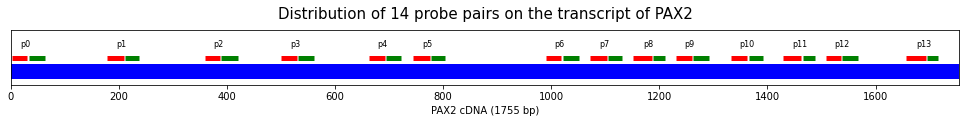

In [ ]:
visualize_probe_position(gene_seq, start_A, start_B, stop_A, stop_B, np.unique(np.array(probe_pairs.Pair_id.values)), gene_name)

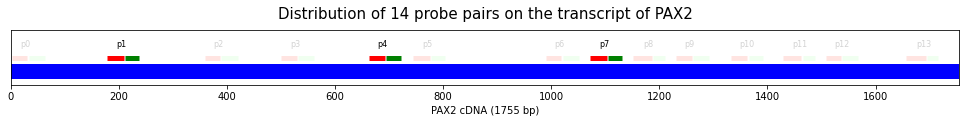

In [ ]:
visualize_probe_position_highlight(gene_seq, start_A, start_B, stop_A, stop_B, [1,4,7], gene_name)

## 1.7 Visualize Parameter (Tm, Energy, OffTarget) distribution

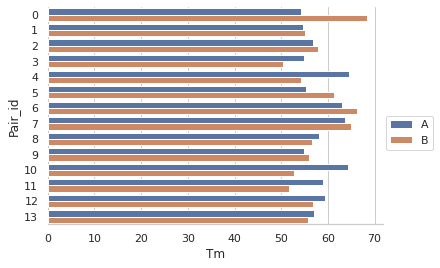

In [ ]:
# plot paired Tm
sns.set_theme(style="whitegrid")
sns.barplot(
    data=probe_pairs,
    y="Pair_id", x="Tm", hue="Part", alpha=1,ci="sd", orient = 'h')
sns.despine(left = True)
plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0)


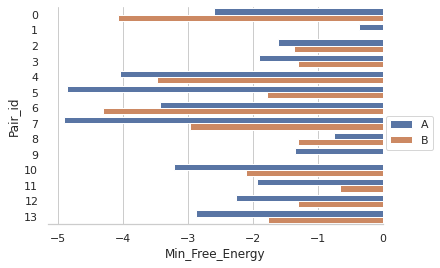

In [ ]:
# plot paired Min Free Energy
sns.set_theme(style="whitegrid")
sns.barplot(
    data=probe_pairs,
    y="Pair_id", x="Min_Free_Energy", hue="Part", alpha=1,ci="sd", orient = 'h')
    #ci="sd", , height=6, palette="dark"
sns.despine(left = True)
plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0)
plt.show()

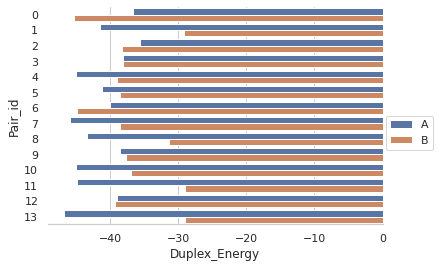

In [ ]:
# plot paired Duplex_Energy
sns.barplot(
    data=probe_pairs,
    y="Pair_id", x="Duplex_Energy", hue="Part", alpha=1,ci="sd", orient = 'h')
    #ci="sd", , height=6, palette="dark"
sns.despine(left = True)
plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0)
plt.show()

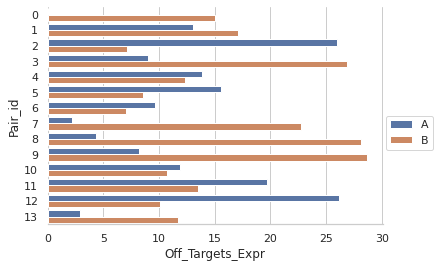

In [ ]:
# plot paired Off_Targets_Expr
sns.barplot(
    data=probe_pairs,
    y="Pair_id", x="Off_Targets_Expr", hue="Part", alpha=1,ci="sd", orient = 'h')
    #ci="sd", , height=6, palette="dark"
sns.despine(left = True)
plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0)
plt.show()

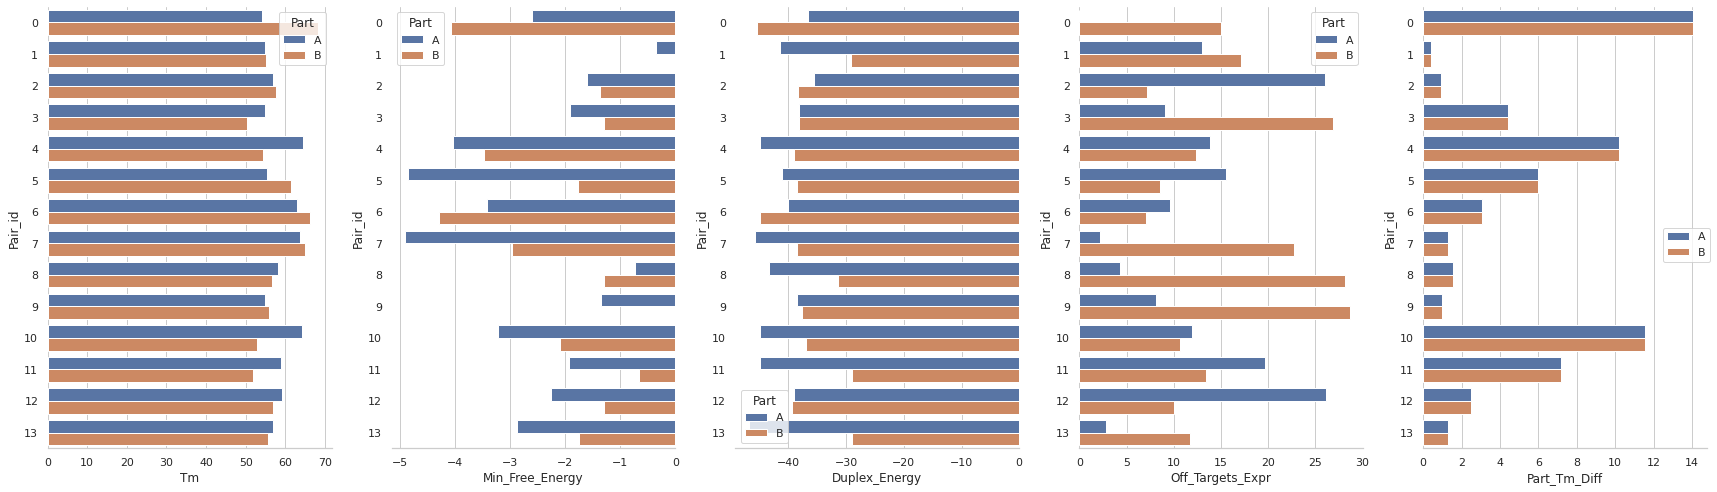

In [ ]:
visualize_paired_parameters(probe_pairs)

## 1.8 Delete Probe

In [ ]:
pairs_saved = np.unique(np.array(probe_pairs.Pair_id.values))
pairs_saved

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

Delete the pair #1


In [ ]:
p = 1
pairs_saved = pairs_saved[pairs_saved!=p]
pairs_saved

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
probe_pairs_selected = probe_pairs.copy()
probe_pairs_selected.loc[~probe_pairs_selected['Pair_id'].isin(pairs_saved), ['Probe','Sequence','Start','Stop', 'Tm', "Min_Free_Energy", "Duplex_Energy", "Off_Targets_Expr"]]=0
probe_pairs_selected.head(10)

,Pair_id,Probe,Original,Part,Sequence,Start,Stop,Original_GC,Original_Consecutive,Original_Start,Original_Stop,Consecutive,Consecutive_C,GC,Tm,BLAST_Hits,BLAST_Hits_Transcripts,BLAST_Hits_Gene,Off_Targets_Expr,Min_Free_Energy,Structure,Duplex_Energy,Equilibrium_Percent,Part_Tm_Diff,Part_GC_Diff
27,0,CCTCGCTGGCGAGTTAATAACTCTCGGG,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,A,CCCGAGAGTTATTAACTCGCCAGCGAGG,4,31,0.650000,0,4,63,0,0,0.571429,54.19563,0,NaN,NaN,0.000000,-2.603,.((((....))))...............,-36.65820,0.999999,14.075796,0.128571
28,0,CCCACCGTCTCGCCCAGGTGGCACGGCATA,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,B,TATGCCGTGCCACCTGGGCGAGACGGTGGG,34,63,0.650000,0,4,63,0,0,0.700000,68.27143,17,"ENST00000597968,ENST00000334464,ENST0000048132...","TRIM28,PDZD8,MYO7A,CD300LD,MAP1A,CCDC85B,MARK2...",14.989758,-4.071,....((((...(((.....)))))))....,-45.34619,1.000000,14.075796,0.128571
1,1,0,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,A,0,0,0,0.500000,0,179,238,0,0,0.580645,0.00000,11,"ENST00000599814,ENST00000599460,ENST0000059350...","SYMPK,MARCH9,TSLP,CCNY,GRID2,NPPA",0.000000,0.000,...............(.(......).)....,0.00000,1.000000,0.414149,0.173238
2,1,0,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,B,0,0,0,0.500000,0,179,238,0,0,0.407407,0.00000,31,"ENST00000607772,ENST00000532611,ENST0000053139...","CNKSR3,GRK2,OR5P4P,OR4K17,MDGA1,HOXD3,KCNA2,AR...",0.000000,0.000,...........................,0.00000,0.999998,0.414149,0.173238
3,2,GGGATAAGTGCCTGACACACACACCCC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,A,GGGGTGTGTGTGTCAGGCACTTATCCC,361,387,0.550000,0,361,420,0,0,0.592593,56.81802,115,"ENST00000466552,ENST00000587063,ENST0000059302...","HELLS,PRCD,ACAN,AKAP6,AC087203.1,USP17L2,AC130...",25.987707,-1.603,.......(((.....))).........,-35.64130,1.000000,0.950529,0.076464
4,2,CTGACTGTTTATCCGAGCTCCTAGCACAGAC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,B,GTCTGTGCTAGGAGCTCGGATAAACAGTCAG,390,420,0.550000,0,361,420,0,0,0.516129,57.76855,12,"ENST00000485254,ENST00000367731,ENST0000035530...","DNM3,ERCC6L2,MCF2L2,ITPR1-DT,SLC26A9",7.157770,-1.368,....((((........((.....))))))..,-38.31710,1.000000,0.950529,0.076464
17,3,AGAGGACTGGACTAGTGCGAAGCAGCATC,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,A,GATGCTGCTTCGCACTAGTCCAGTCCTCT,502,530,0.583333,0,502,561,0,0,0.551724,54.78508,10,"ENST00000452133,ENST00000458187,ENST0000041959...","SYS1-DBNDD2,SYS1",9.025511,-1.911,................((...))......,-38.16386,1.000000,4.437814,0.034483
18,3,CGTAAGAAAGCGAGGAGAGGAAGGGCCTG,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,B,CAGGCCCTTCCTCTCCTCGCTTTCTTACG,533,561,0.583333,0,502,561,0,0,0.586207,50.34726,35,"ENST00000497225,ENST00000424656,ENST0000030232...","MN1,MMP2,SPEG,CLK2,AL390839.2,LINC01346,NRSN2,...",26.835726,-1.305,.................(((.....))).,-38.13509,1.000000,4.437814,0.034483
23,4,CTGGGCGAGAGGGCGACTCAGGCCTTGCGA,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,A,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAG,664,693,0.666667,1,664,723,0,0,0.700000,64.47109,15,"ENST00000491910,ENST00000422107,ENST0000064068...","LRRC75B,AL353771.1,PFKFB3",13.842346,-4.051,.....((.((((.(......).)))).)).,-44.94628,1.000000,10.203103,0.092857
24,4,AAGCACAGACGCTGGGCTGAAGACTGGG,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,B,CCCAGTCTTCAGCCCAGCGTCTGTGCTT,696,723,0.666667,1,664,723,0,0,0.607143,54.26799,20,"ENST00000552951,ENST00000633579,ENST0000058316...","C12orf45,AC073107.1,OSBPL7,AL845331.3,CYCSP6,A...",12.357804,-3.480,.(((.((.....)).)))..........,-38.94143,1.000000,10.203103,0.092857


In [ ]:
# update start and stop positions
start_A = probe_pairs_selected.Start.values[probe_pairs_selected.Part.values=="A"]
start_B = probe_pairs_selected.Start.values[probe_pairs_selected.Part.values=="B"]
stop_A = probe_pairs_selected.Stop.values[probe_pairs_selected.Part.values=="A"]
stop_B = probe_pairs_selected.Stop.values[probe_pairs_selected.Part.values=="B"]
print(start_A)
print(start_B)
print(stop_A)
print(stop_B)

[   4    0  361  502  664  745  992 1072 1152 1232 1333 1429 1509 1657]
[  34    0  390  533  696  779 1022 1106 1189 1263 1366 1466 1539 1697]
[  31    0  387  530  693  776 1019 1103 1186 1260 1363 1463 1536 1694]
[  63    0  420  561  723  804 1051 1131 1211 1291 1392 1488 1568 1716]


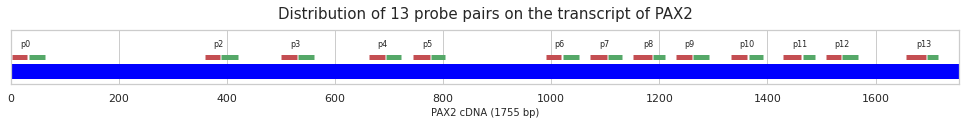

In [ ]:
visualize_probe_position(gene_seq, start_A, start_B, stop_A, stop_B, np.unique(np.array(probe_pairs.Pair_id.values)),gene_name)

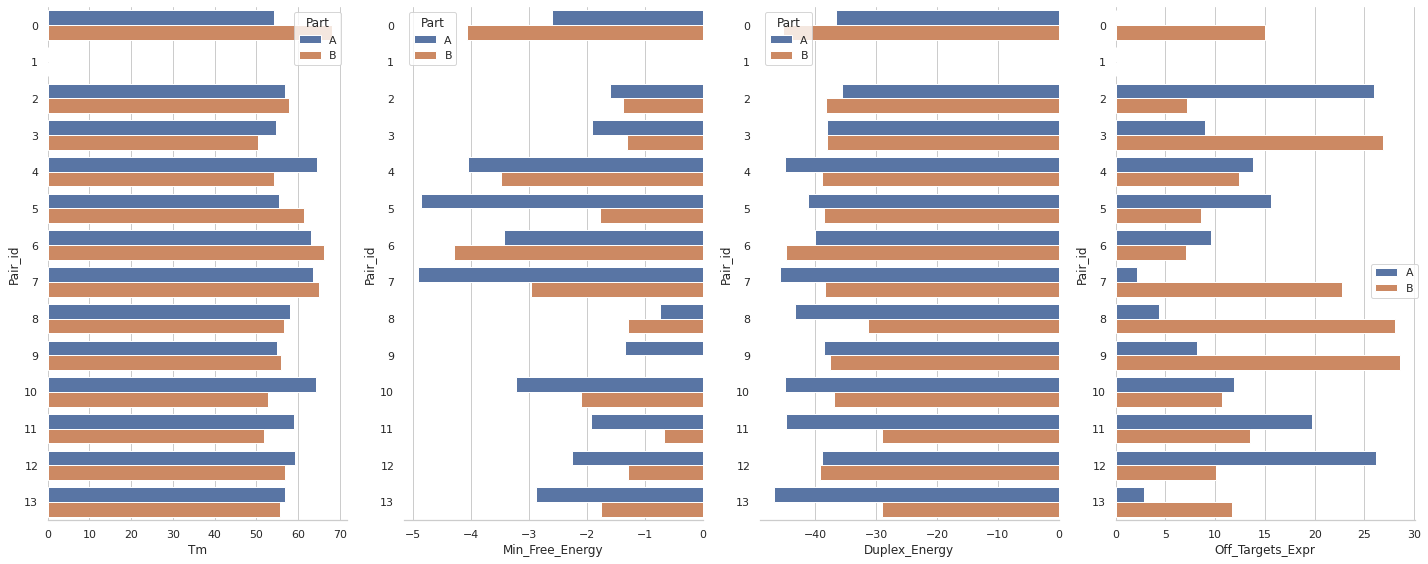

In [ ]:
visualize_paired_parameters(probe_pairs_selected)

## 1.9 Separate Part A & B

In [ ]:
probe_pairs_separate = pd.merge(left=probe_pairs[probe_pairs.Part=="A"], right = probe_pairs[probe_pairs.Part=="B"], on="Pair_id", suffixes=("_A","_B"))
probe_pairs_separate

,Pair_id,Probe_A,Original_A,Part_A,Sequence_A,Start_A,Stop_A,Original_GC_A,Original_Consecutive_A,Original_Start_A,Original_Stop_A,Consecutive_A,Consecutive_C_A,GC_A,Tm_A,BLAST_Hits_A,BLAST_Hits_Transcripts_A,BLAST_Hits_Gene_A,Off_Targets_Expr_A,Min_Free_Energy_A,Structure_A,Duplex_Energy_A,Equilibrium_Percent_A,Part_Tm_Diff_A,Part_GC_Diff_A,Probe_B,Original_B,Part_B,Sequence_B,Start_B,Stop_B,Original_GC_B,Original_Consecutive_B,Original_Start_B,Original_Stop_B,Consecutive_B,Consecutive_C_B,GC_B,Tm_B,BLAST_Hits_B,BLAST_Hits_Transcripts_B,BLAST_Hits_Gene_B,Off_Targets_Expr_B,Min_Free_Energy_B,Structure_B,Duplex_Energy_B,Equilibrium_Percent_B,Part_Tm_Diff_B,Part_GC_Diff_B
0,0,CCTCGCTGGCGAGTTAATAACTCTCGGG,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,A,CCCGAGAGTTATTAACTCGCCAGCGAGG,4,31,0.650000,0,4,63,0,0,0.571429,54.19563,0,NaN,NaN,0.000000,-2.603,.((((....))))...............,-36.65820,0.999999,14.075796,0.128571,CCCACCGTCTCGCCCAGGTGGCACGGCATA,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,B,TATGCCGTGCCACCTGGGCGAGACGGTGGG,34,63,0.650000,0,4,63,0,0,0.700000,68.27143,17,"ENST00000597968,ENST00000334464,ENST0000048132...","TRIM28,PDZD8,MYO7A,CD300LD,MAP1A,CCDC85B,MARK2...",14.989758,-4.071,....((((...(((.....)))))))....,-45.34619,1.000000,14.075796,0.128571
1,1,AAGTAGAGCAAGGAAGGCGGATGAGGCAGGG,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,A,CCCTGCCTCATCCGCCTTCCTTGCTCTACTT,179,209,0.500000,0,179,238,0,0,0.580645,54.76375,11,"ENST00000599814,ENST00000599460,ENST0000059350...","SYMPK,MARCH9,TSLP,CCNY,GRID2,NPPA",13.021947,-0.359,...............(.(......).)....,-41.52071,1.000000,0.414149,0.173238,GTATCTCTCTTTCACCTCCTTAGTATC,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,B,GATACTAAGGAGGTGAAAGAGAGATAC,212,238,0.500000,0,179,238,0,0,0.407407,55.17790,31,"ENST00000607772,ENST00000532611,ENST0000053139...","CNKSR3,GRK2,OR5P4P,OR4K17,MDGA1,HOXD3,KCNA2,AR...",17.081451,0.000,...........................,-29.14619,0.999998,0.414149,0.173238
2,2,GGGATAAGTGCCTGACACACACACCCC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,A,GGGGTGTGTGTGTCAGGCACTTATCCC,361,387,0.550000,0,361,420,0,0,0.592593,56.81802,115,"ENST00000466552,ENST00000587063,ENST0000059302...","HELLS,PRCD,ACAN,AKAP6,AC087203.1,USP17L2,AC130...",25.987707,-1.603,.......(((.....))).........,-35.64130,1.000000,0.950529,0.076464,CTGACTGTTTATCCGAGCTCCTAGCACAGAC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,B,GTCTGTGCTAGGAGCTCGGATAAACAGTCAG,390,420,0.550000,0,361,420,0,0,0.516129,57.76855,12,"ENST00000485254,ENST00000367731,ENST0000035530...","DNM3,ERCC6L2,MCF2L2,ITPR1-DT,SLC26A9",7.157770,-1.368,....((((........((.....))))))..,-38.31710,1.000000,0.950529,0.076464
3,3,AGAGGACTGGACTAGTGCGAAGCAGCATC,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,A,GATGCTGCTTCGCACTAGTCCAGTCCTCT,502,530,0.583333,0,502,561,0,0,0.551724,54.78508,10,"ENST00000452133,ENST00000458187,ENST0000041959...","SYS1-DBNDD2,SYS1",9.025511,-1.911,................((...))......,-38.16386,1.000000,4.437814,0.034483,CGTAAGAAAGCGAGGAGAGGAAGGGCCTG,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,B,CAGGCCCTTCCTCTCCTCGCTTTCTTACG,533,561,0.583333,0,502,561,0,0,0.586207,50.34726,35,"ENST00000497225,ENST00000424656,ENST0000030232...","MN1,MMP2,SPEG,CLK2,AL390839.2,LINC01346,NRSN2,...",26.835726,-1.305,.................(((.....))).,-38.13509,1.000000,4.437814,0.034483
4,4,CTGGGCGAGAGGGCGACTCAGGCCTTGCGA,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,A,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAG,664,693,0.666667,1,664,723,0,0,0.700000,64.47109,15,"ENST00000491910,ENST00000422107,ENST0000064068...","LRRC75B,AL353771.1,PFKFB3",13.842346,-4.051,.....((.((((.(......).)))).)).,-44.94628,1.000000,10.203103,0.092857,AAGCACAGACGCTGGGCTGAAGACTGGG,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,B,CCCAGTCTTCAGCCCAGCGTCTGTGCTT,696,723,0.666667,1,664,723,0,0,0.607143,54.26799,20,"ENST00000552951,ENST00000633579,ENST0000058316...","C12orf45,AC073107.1,OSBPL7,AL845331.3,CYCSP6,A...",12.357804,-3.480,.(((.((.....)).)))..........,-38.94143,1.

## 1.10 Rank Part_Tm_Diff, Off_Targets_Expr, Min_Free_Energy, Duplex_Energy, Dist_target_Tm

In [ ]:
Min_Min_Free_Energy = [min(x,y) for x,y in zip(probe_pairs_separate.Min_Free_Energy_A.values, probe_pairs_separate.Min_Free_Energy_B.values)]
rank_Min_Free_Energy = np.argsort(np.argsort(np.array(Min_Min_Free_Energy),kind="mergesort")[::-1])
print(Min_Min_Free_Energy)

[-4.071000000000001, -0.359, -1.6030000000000002, -1.911, -4.051, -4.86, -4.3, -4.914, -1.296, -1.349, -3.219, -1.935, -2.26, -2.877]


In [ ]:
print(rank_Min_Free_Energy)

[10  0  3  4  9 12 11 13  1  2  8  5  6  7]


In [ ]:
Min_Duplex_Energy = [min(x,y) for x,y in zip(probe_pairs_separate.Duplex_Energy_A.values, probe_pairs_separate.Duplex_Energy_B.values)]
rank_Duplex_Energy = np.argsort(np.argsort(np.array(Min_Duplex_Energy),kind="mergesort")[::-1])
print(rank_Duplex_Energy)

[11  5  1  0  9  4  8 12  6  2 10  7  3 13]


In [ ]:
Max_Off_target = [max(x,y) for x,y in zip(probe_pairs_separate.Off_Targets_Expr_A.values, probe_pairs_separate.Off_Targets_Expr_B.values)]
rank_Max_Off_target = np.argsort(np.argsort(np.array(Max_Off_target),kind="mergesort"))
print(rank_Max_Off_target)

[ 4  6  9 11  3  5  0  8 12 13  2  7 10  1]


In [ ]:
pair_number = probe_pairs_separate.shape[0]
# Rank Part_Tm_Diff
try: # ascending order
  rank_Part_Tm_Diff = np.argsort(np.argsort(probe_pairs_separate.Part_Tm_Diff_A.values))
  print("rank_Part_Tm_Diff:\t",rank_Part_Tm_Diff)
except: # set all to 0 if this column is missing
  rank_Part_Tm_Diff = np.zeros((pair_number,), dtype="int")
  print("rank_Part_Tm_Diff:\t",rank_Part_Tm_Diff)

# Rank Off_Targets_Expr
try: # ascending order
  Max_Off_target = [max(x,y) for x,y in zip(probe_pairs_separate.Off_Targets_Expr_A.values, probe_pairs_separate.Off_Targets_Expr_B.values)]
  rank_Max_Off_target = np.argsort(np.argsort(np.array(Max_Off_target),kind="mergesort"))
  print("rank_Max_Off_target:\t",rank_Max_Off_target)
except: # set all to 0 if this column is missing
  rank_Max_Off_target = np.zeros((pair_number,), dtype="int")
  print("rank_Max_Off_target:\t",rank_Max_Off_target)

# Rank Min_Free_Energy
try: # descending order
  Min_Min_Free_Energy = [min(x,y) for x,y in zip(probe_pairs_separate.Min_Free_Energy_A.values, probe_pairs_separate.Min_Free_Energy_B.values)]
  rank_Min_Free_Energy = np.argsort(np.argsort(np.array(Min_Min_Free_Energy),kind="mergesort")[::-1])
  print("rank_Min_Free_Energy:\t",rank_Min_Free_Energy)
except: # set all to 0 if this column is missing
  rank_Min_Free_Energy = np.zeros((pair_number,), dtype="int")
  print("rank_Min_Free_Energy:\t",rank_Min_Free_Energy)

# Rank Duplex_Energy
try: # descending order
  Min_Duplex_Energy = [min(x,y) for x,y in zip(probe_pairs_separate.Duplex_Energy_A.values, probe_pairs_separate.Duplex_Energy_B.values)]
  rank_Duplex_Energy = np.argsort(np.argsort(np.array(Min_Duplex_Energy),kind="mergesort")[::-1])
  print("rank_Duplex_Energy:\t",rank_Duplex_Energy)
except: # set all to 0 if this column is missing
  rank_Duplex_Energy = np.zeros((pair_number,), dtype="int")
  print("rank_Duplex_Energy:\t", rank_Duplex_Energy)

# Rank target_Tm
target_Tm=60
try: # ascending order
  Dist_target_Tm = [max(abs(x-target_Tm),abs(y-target_Tm)) for x,y in zip(probe_pairs_separate.Tm_A.values, probe_pairs_separate.Tm_B.values)]
  rank_Dist_target_Tm = np.argsort(np.argsort(np.array(Dist_target_Tm),kind="mergesort"))
  print("rank_Dist_target_Tm:\t", rank_Dist_target_Tm)
except: # set all to 0 if this column is missing
  rank_Dist_target_Tm = np.zeros((pair_number,), dtype="int")
  print("rank_Dist_target_Tm:\t", rank_Dist_target_Tm)

rank_Part_Tm_Diff:	 [13  0  1  8 11  9  7  4  5  2 12 10  6  3]
rank_Max_Off_target:	 [ 4  6  9 11  3  5  0  8 12 13  2  7 10  1]
rank_Min_Free_Energy:	 [10  0  3  4  9 12 11 13  1  2  8  5  6  7]
rank_Duplex_Energy:	 [11  5  1  0  9  4  8 12  6  2 10  7  3 13]
rank_Dist_target_Tm:	 [12  7  0 13  8  4  9  5  2  6 10 11  1  3]


Compute the weighted score

In [ ]:
# Define weights
Tm_weight = 0.2
hairpin_weight=0.2
duplex_weight=0.2
offtarget_weight=0.2
target_Tm_weight = 0.2
# weighted sum
score1 = [(Tm_weight*a+hairpin_weight*b+duplex_weight*c+offtarget_weight*d) for a,b,c,d in zip(rank_Part_Tm_Diff,rank_Max_Off_target,rank_Min_Free_Energy,rank_Duplex_Energy)]
score2 = [(Tm_weight*a+hairpin_weight*b+duplex_weight*c+offtarget_weight*d+target_Tm_weight*e) for a,b,c,d,e in zip(rank_Part_Tm_Diff,rank_Max_Off_target,rank_Min_Free_Energy,rank_Duplex_Energy, rank_Dist_target_Tm)]
print(score1) # without Tm
print(score2) # with Tm

[7.6000000000000005, 2.2, 2.8000000000000003, 4.6000000000000005, 6.4, 6.0, 5.200000000000001, 7.4, 4.800000000000001, 3.8, 6.4, 5.800000000000001, 5.0, 4.800000000000001]
[10.0, 3.6000000000000005, 2.8000000000000003, 7.200000000000001, 8.0, 6.8, 7.000000000000001, 8.4, 5.200000000000001, 5.0, 8.4, 8.0, 5.2, 5.4]


## 1.11 Select pairs - balanced

In [ ]:
score=score2
probe_pairs_separate.insert(0, "Score", score, allow_duplicates=True)

In [ ]:
region_id = np.array([int(x//(len(gene_seq)/4)) for x in probe_pairs_separate.Start_A.values])
print(region_id)

[0 0 0 1 1 1 2 2 2 2 3 3 3 3]


In [ ]:
probe_pairs_separate.insert(7, "region_id", region_id, allow_duplicates=True)
probe_pairs_separate

,Score,Pair_id,Probe_A,Original_A,Part_A,Sequence_A,Start_A,region_id,Stop_A,Original_GC_A,Original_Consecutive_A,Original_Start_A,Original_Stop_A,Consecutive_A,Consecutive_C_A,GC_A,Tm_A,BLAST_Hits_A,BLAST_Hits_Transcripts_A,BLAST_Hits_Gene_A,Off_Targets_Expr_A,Min_Free_Energy_A,Structure_A,Duplex_Energy_A,Equilibrium_Percent_A,Part_Tm_Diff_A,Part_GC_Diff_A,Probe_B,Original_B,Part_B,Sequence_B,Start_B,Stop_B,Original_GC_B,Original_Consecutive_B,Original_Start_B,Original_Stop_B,Consecutive_B,Consecutive_C_B,GC_B,Tm_B,BLAST_Hits_B,BLAST_Hits_Transcripts_B,BLAST_Hits_Gene_B,Off_Targets_Expr_B,Min_Free_Energy_B,Structure_B,Duplex_Energy_B,Equilibrium_Percent_B,Part_Tm_Diff_B,Part_GC_Diff_B
0,10.0,0,CCTCGCTGGCGAGTTAATAACTCTCGGG,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,A,CCCGAGAGTTATTAACTCGCCAGCGAGG,4,0,31,0.650000,0,4,63,0,0,0.571429,54.19563,0,NaN,NaN,0.000000,-2.603,.((((....))))...............,-36.65820,0.999999,14.075796,0.128571,CCCACCGTCTCGCCCAGGTGGCACGGCATA,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,B,TATGCCGTGCCACCTGGGCGAGACGGTGGG,34,63,0.650000,0,4,63,0,0,0.700000,68.27143,17,"ENST00000597968,ENST00000334464,ENST0000048132...","TRIM28,PDZD8,MYO7A,CD300LD,MAP1A,CCDC85B,MARK2...",14.989758,-4.071,....((((...(((.....)))))))....,-45.34619,1.000000,14.075796,0.128571
1,3.6,1,AAGTAGAGCAAGGAAGGCGGATGAGGCAGGG,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,A,CCCTGCCTCATCCGCCTTCCTTGCTCTACTT,179,0,209,0.500000,0,179,238,0,0,0.580645,54.76375,11,"ENST00000599814,ENST00000599460,ENST0000059350...","SYMPK,MARCH9,TSLP,CCNY,GRID2,NPPA",13.021947,-0.359,...............(.(......).)....,-41.52071,1.000000,0.414149,0.173238,GTATCTCTCTTTCACCTCCTTAGTATC,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,B,GATACTAAGGAGGTGAAAGAGAGATAC,212,238,0.500000,0,179,238,0,0,0.407407,55.17790,31,"ENST00000607772,ENST00000532611,ENST0000053139...","CNKSR3,GRK2,OR5P4P,OR4K17,MDGA1,HOXD3,KCNA2,AR...",17.081451,0.000,...........................,-29.14619,0.999998,0.414149,0.173238
2,2.8,2,GGGATAAGTGCCTGACACACACACCCC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,A,GGGGTGTGTGTGTCAGGCACTTATCCC,361,0,387,0.550000,0,361,420,0,0,0.592593,56.81802,115,"ENST00000466552,ENST00000587063,ENST0000059302...","HELLS,PRCD,ACAN,AKAP6,AC087203.1,USP17L2,AC130...",25.987707,-1.603,.......(((.....))).........,-35.64130,1.000000,0.950529,0.076464,CTGACTGTTTATCCGAGCTCCTAGCACAGAC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,B,GTCTGTGCTAGGAGCTCGGATAAACAGTCAG,390,420,0.550000,0,361,420,0,0,0.516129,57.76855,12,"ENST00000485254,ENST00000367731,ENST0000035530...","DNM3,ERCC6L2,MCF2L2,ITPR1-DT,SLC26A9",7.157770,-1.368,....((((........((.....))))))..,-38.31710,1.000000,0.950529,0.076464
3,7.2,3,AGAGGACTGGACTAGTGCGAAGCAGCATC,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,A,GATGCTGCTTCGCACTAGTCCAGTCCTCT,502,1,530,0.583333,0,502,561,0,0,0.551724,54.78508,10,"ENST00000452133,ENST00000458187,ENST0000041959...","SYS1-DBNDD2,SYS1",9.025511,-1.911,................((...))......,-38.16386,1.000000,4.437814,0.034483,CGTAAGAAAGCGAGGAGAGGAAGGGCCTG,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,B,CAGGCCCTTCCTCTCCTCGCTTTCTTACG,533,561,0.583333,0,502,561,0,0,0.586207,50.34726,35,"ENST00000497225,ENST00000424656,ENST0000030232...","MN1,MMP2,SPEG,CLK2,AL390839.2,LINC01346,NRSN2,...",26.835726,-1.305,.................(((.....))).,-38.13509,1.000000,4.437814,0.034483
4,8.0,4,CTGGGCGAGAGGGCGACTCAGGCCTTGCGA,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,A,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAG,664,1,693,0.666667,1,664,723,0,0,0.700000,64.47109,15,"ENST00000491910,ENST00000422107,ENST0000064068...","LRRC75B,AL353771.1,PFKFB3",13.842346,-4.051,.....((.((((.(......).)))).)).,-44.94628,1.000000,10.203103,0.092857,AAGCACAGACGCTGGGCTGAAGACTGGG,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,B,CCCAGTCTTCAGCCCAGCGTCTGTGCTT,696,723,0.666667,1,664,723,0,0,0.607143,54.26799,20,"ENST00000552951,ENST00000633579,ENST0000058316...","C12orf45,AC073107.1,OSBPL7,AL845331.3,CYCSP6,A...",12.357804,-

In [ ]:
score

[10.0,
 3.6000000000000005,
 2.8000000000000003,
 7.200000000000001,
 8.0,
 6.8,
 7.000000000000001,
 8.4,
 5.200000000000001,
 5.0,
 8.4,
 8.0,
 5.2,
 5.4]

Select top 1 from each region

In [ ]:
n_region = max(region_id)+1
top_regional = [0]*n_region
for i in range(n_region):
    top_id = probe_pairs_separate[probe_pairs_separate.region_id==i].sort_values("Score").Pair_id.values[0]
    print(top_id)
    top_regional[i] = top_id
print(top_regional)

2
5
9
12
[2, 5, 9, 12]


Select top 4 from the rest

In [ ]:
top_rest = probe_pairs_separate[~probe_pairs_separate.Pair_id.isin(top_regional)].sort_values("Score").Pair_id.values[:4]
top_rest

array([ 1,  8, 13,  6])

Combine into top 8:

In [ ]:
top_combine = np.concatenate((top_regional,top_rest))
top_combine

array([ 2,  5,  9, 12,  1,  8, 13,  6])

In [ ]:
probe_pairs_selected = probe_pairs_separate[probe_pairs_separate.Pair_id.isin(top_combine)]
probe_pairs_selected

,Score,Pair_id,Probe_A,Original_A,Part_A,Sequence_A,Start_A,region_id,Stop_A,Original_GC_A,Original_Consecutive_A,Original_Start_A,Original_Stop_A,Consecutive_A,Consecutive_C_A,GC_A,Tm_A,BLAST_Hits_A,BLAST_Hits_Transcripts_A,BLAST_Hits_Gene_A,Off_Targets_Expr_A,Min_Free_Energy_A,Structure_A,Duplex_Energy_A,Equilibrium_Percent_A,Part_Tm_Diff_A,Part_GC_Diff_A,Probe_B,Original_B,Part_B,Sequence_B,Start_B,Stop_B,Original_GC_B,Original_Consecutive_B,Original_Start_B,Original_Stop_B,Consecutive_B,Consecutive_C_B,GC_B,Tm_B,BLAST_Hits_B,BLAST_Hits_Transcripts_B,BLAST_Hits_Gene_B,Off_Targets_Expr_B,Min_Free_Energy_B,Structure_B,Duplex_Energy_B,Equilibrium_Percent_B,Part_Tm_Diff_B,Part_GC_Diff_B
1,3.6,1,AAGTAGAGCAAGGAAGGCGGATGAGGCAGGG,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,A,CCCTGCCTCATCCGCCTTCCTTGCTCTACTT,179,0,209,0.500000,0,179,238,0,0,0.580645,54.76375,11,"ENST00000599814,ENST00000599460,ENST0000059350...","SYMPK,MARCH9,TSLP,CCNY,GRID2,NPPA",13.021947,-0.359,...............(.(......).)....,-41.52071,1.0,0.414149,0.173238,GTATCTCTCTTTCACCTCCTTAGTATC,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,B,GATACTAAGGAGGTGAAAGAGAGATAC,212,238,0.500000,0,179,238,0,0,0.407407,55.17790,31,"ENST00000607772,ENST00000532611,ENST0000053139...","CNKSR3,GRK2,OR5P4P,OR4K17,MDGA1,HOXD3,KCNA2,AR...",17.081451,0.000,...........................,-29.14619,0.999998,0.414149,0.173238
2,2.8,2,GGGATAAGTGCCTGACACACACACCCC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,A,GGGGTGTGTGTGTCAGGCACTTATCCC,361,0,387,0.550000,0,361,420,0,0,0.592593,56.81802,115,"ENST00000466552,ENST00000587063,ENST0000059302...","HELLS,PRCD,ACAN,AKAP6,AC087203.1,USP17L2,AC130...",25.987707,-1.603,.......(((.....))).........,-35.64130,1.0,0.950529,0.076464,CTGACTGTTTATCCGAGCTCCTAGCACAGAC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,B,GTCTGTGCTAGGAGCTCGGATAAACAGTCAG,390,420,0.550000,0,361,420,0,0,0.516129,57.76855,12,"ENST00000485254,ENST00000367731,ENST0000035530...","DNM3,ERCC6L2,MCF2L2,ITPR1-DT,SLC26A9",7.157770,-1.368,....((((........((.....))))))..,-38.31710,1.000000,0.950529,0.076464
5,6.8,5,CTTGAGAAGAAAGGTGGTGGACCTCCACGACC,GGTCGTGGAGGTCCACCACCTTTCTTCTCAAGCTCGGGAACATGCC...,A,GGTCGTGGAGGTCCACCACCTTTCTTCTCAAG,745,1,776,0.616667,0,745,804,0,0,0.562500,55.33819,29,"ENST00000446969,ENST00000442165,ENST0000041412...","AC009237.6,AC009238.1,BX284668.3,FYCO1,TTC28-A...",15.575398,-4.860,............(((.((((....)))).))),-41.15073,1.0,5.993263,0.129808,AGGCAGGGCGGAAGGGCATGTTCCCG,GGTCGTGGAGGTCCACCACCTTTCTTCTCAAGCTCGGGAACATGCC...,B,CGGGAACATGCCCTTCCGCCCTGCCT,779,804,0.616667,0,745,804,0,0,0.692308,61.33146,11,"ENST00000216181,ENST00000559615,ENST0000044050...","MYH9,LINC00596,TANK,RYR1,AC024651.2,STXBP6,MRO...",8.589689,-1.774,...((.(.(.....).).))......,-38.52825,1.000000,5.993263,0.129808
6,7.0,6,GGGAGATGTCACAGGGCCGCACACCCTG,CAGGGTGTGCGGCCCTGTGACATCTCCCGGCAGCTGCGGGTCAGCC...,A,CAGGGTGTGCGGCCCTGTGACATCTCCC,992,2,1019,0.700000,0,992,1051,0,0,0.678571,63.04329,30,"ENST00000611453,ENST00000463946,ENST0000048349...","PAX4,WSCD1,CDH11,PAX7,KCNJ12,CASTOR2,CMTM7",9.629794,-3.427,...........(((((.......))))),-39.99646,1.0,3.086305,0.021429,GCTGACACAGCCGTGGCTGACCCGCAGCTG,CAGGGTGTGCGGCCCTGTGACATCTCCCGGCAGCTGCGGGTCAGCC...,B,CAGCTGCGGGTCAGCCACGGCTGTGTCAGC,1022,1051,0.700000,0,992,1051,0,0,0.700000,66.12959,23,"ENST00000651199,ENST00000377847,ENST0000041444...","PAX5,SDK1,FIZ1,NTN3,SNX19P2,ACP6",7.065802,-4.300,((((...))))....((((.....))))..,-44.87474,1.000000,3.086305,0.021429
8,5.2,8,GGCGAACATAGTCGGGTTCTGTCGTTTGTATTCAG,CTGAATACAAACGACAGAACCCGACTATGTTCGCCTGGGAGATTCG...,A,CTGAATACAAACGACAGAACCCGACTATGTTCGCC,1152,2,1186,0.550000,0,1152,1211,0,0,0.485714,58.18710,3,"ENST00000372996,ENST00000489290,ENST00000230340",BYSL,4.323521,-0.742,..(((......))).....................,-43.41321,1.0,1.575683,0.166460,CCAGGAGCCGGTCTCGAATCTCC,CTGAATACAAACGACAGAACCCGACTATGTTCGCCTGGGAGATTCG...,B,GGAGATTCGAGACCGGCTCCTGG,1189,1211,0.550000,0,1152,1211,0,0,0.652174,56.61141,20,"ENST00000467778,ENST00000263334,ENST

Select the top N pairs

In [ ]:
# add the Score as a column
# probe_pairs_separate.insert(0, "Score", score, allow_duplicates=True)
probe_pairs_separate

,Score,Pair_id,Probe_A,Original_A,Part_A,Sequence_A,Start_A,Stop_A,Original_GC_A,Original_Consecutive_A,Original_Start_A,Original_Stop_A,Consecutive_A,Consecutive_C_A,GC_A,Tm_A,BLAST_Hits_A,BLAST_Hits_Transcripts_A,BLAST_Hits_Gene_A,Off_Targets_Expr_A,Min_Free_Energy_A,Structure_A,Duplex_Energy_A,Equilibrium_Percent_A,Part_Tm_Diff_A,Part_GC_Diff_A,Probe_B,Original_B,Part_B,Sequence_B,Start_B,Stop_B,Original_GC_B,Original_Consecutive_B,Original_Start_B,Original_Stop_B,Consecutive_B,Consecutive_C_B,GC_B,Tm_B,BLAST_Hits_B,BLAST_Hits_Transcripts_B,BLAST_Hits_Gene_B,Off_Targets_Expr_B,Min_Free_Energy_B,Structure_B,Duplex_Energy_B,Equilibrium_Percent_B,Part_Tm_Diff_B,Part_GC_Diff_B
0,9.50,0,CCTCGCTGGCGAGTTAATAACTCTCGGG,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,A,CCCGAGAGTTATTAACTCGCCAGCGAGG,4,31,0.650000,0,4,63,0,0,0.571429,54.19563,0,NaN,NaN,0.000000,-2.603,.((((....))))...............,-36.65820,0.999999,14.075796,0.128571,CCCACCGTCTCGCCCAGGTGGCACGGCATA,CCCGAGAGTTATTAACTCGCCAGCGAGGCCTATGCCGTGCCACCTG...,B,TATGCCGTGCCACCTGGGCGAGACGGTGGG,34,63,0.650000,0,4,63,0,0,0.700000,68.27143,17,"ENST00000597968,ENST00000334464,ENST0000048132...","TRIM28,PDZD8,MYO7A,CD300LD,MAP1A,CCDC85B,MARK2...",14.989758,-4.071,....((((...(((.....)))))))....,-45.34619,1.000000,14.075796,0.128571
1,2.75,1,AAGTAGAGCAAGGAAGGCGGATGAGGCAGGG,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,A,CCCTGCCTCATCCGCCTTCCTTGCTCTACTT,179,209,0.500000,0,179,238,0,0,0.580645,54.76375,11,"ENST00000599814,ENST00000599460,ENST0000059350...","SYMPK,MARCH9,TSLP,CCNY,GRID2,NPPA",13.021947,-0.359,...............(.(......).)....,-41.52071,1.000000,0.414149,0.173238,GTATCTCTCTTTCACCTCCTTAGTATC,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,B,GATACTAAGGAGGTGAAAGAGAGATAC,212,238,0.500000,0,179,238,0,0,0.407407,55.17790,31,"ENST00000607772,ENST00000532611,ENST0000053139...","CNKSR3,GRK2,OR5P4P,OR4K17,MDGA1,HOXD3,KCNA2,AR...",17.081451,0.000,...........................,-29.14619,0.999998,0.414149,0.173238
2,3.50,2,GGGATAAGTGCCTGACACACACACCCC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,A,GGGGTGTGTGTGTCAGGCACTTATCCC,361,387,0.550000,0,361,420,0,0,0.592593,56.81802,115,"ENST00000466552,ENST00000587063,ENST0000059302...","HELLS,PRCD,ACAN,AKAP6,AC087203.1,USP17L2,AC130...",25.987707,-1.603,.......(((.....))).........,-35.64130,1.000000,0.950529,0.076464,CTGACTGTTTATCCGAGCTCCTAGCACAGAC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,B,GTCTGTGCTAGGAGCTCGGATAAACAGTCAG,390,420,0.550000,0,361,420,0,0,0.516129,57.76855,12,"ENST00000485254,ENST00000367731,ENST0000035530...","DNM3,ERCC6L2,MCF2L2,ITPR1-DT,SLC26A9",7.157770,-1.368,....((((........((.....))))))..,-38.31710,1.000000,0.950529,0.076464
3,5.75,3,AGAGGACTGGACTAGTGCGAAGCAGCATC,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,A,GATGCTGCTTCGCACTAGTCCAGTCCTCT,502,530,0.583333,0,502,561,0,0,0.551724,54.78508,10,"ENST00000452133,ENST00000458187,ENST0000041959...","SYS1-DBNDD2,SYS1",9.025511,-1.911,................((...))......,-38.16386,1.000000,4.437814,0.034483,CGTAAGAAAGCGAGGAGAGGAAGGGCCTG,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,B,CAGGCCCTTCCTCTCCTCGCTTTCTTACG,533,561,0.583333,0,502,561,0,0,0.586207,50.34726,35,"ENST00000497225,ENST00000424656,ENST0000030232...","MN1,MMP2,SPEG,CLK2,AL390839.2,LINC01346,NRSN2,...",26.835726,-1.305,.................(((.....))).,-38.13509,1.000000,4.437814,0.034483
4,8.00,4,CTGGGCGAGAGGGCGACTCAGGCCTTGCGA,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,A,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAG,664,693,0.666667,1,664,723,0,0,0.700000,64.47109,15,"ENST00000491910,ENST00000422107,ENST0000064068...","LRRC75B,AL353771.1,PFKFB3",13.842346,-4.051,.....((.((((.(......).)))).)).,-44.94628,1.000000,10.203103,0.092857,AAGCACAGACGCTGGGCTGAAGACTGGG,TCGCAAGGCCTGAGTCGCCCTCTCGCCCAGCCCCCAGTCTTCAGCC...,B,CCCAGTCTTCAGCCCAGCGTCTGTGCTT,696,723,0.666667,1,664,723,0,0,0.607143,54.26799,20,"ENST00000552951,ENST00000633579,ENST0000058316...","C12orf45,AC073107.1,OSBPL7,AL845331.3,CYCSP6,A...",12.357804,-3.480,.(((.((...

In [ ]:
probe_pairs_separate = probe_pairs_separate.sort_values(by="Score", ignore_index=True)
probe_pairs_separate.iloc[:8,]

,Score,Pair_id,Probe_A,Original_A,Part_A,Sequence_A,Start_A,Stop_A,Original_GC_A,Original_Consecutive_A,Original_Start_A,Original_Stop_A,Consecutive_A,Consecutive_C_A,GC_A,Tm_A,BLAST_Hits_A,BLAST_Hits_Transcripts_A,BLAST_Hits_Gene_A,Off_Targets_Expr_A,Min_Free_Energy_A,Structure_A,Duplex_Energy_A,Equilibrium_Percent_A,Part_Tm_Diff_A,Part_GC_Diff_A,Probe_B,Original_B,Part_B,Sequence_B,Start_B,Stop_B,Original_GC_B,Original_Consecutive_B,Original_Start_B,Original_Stop_B,Consecutive_B,Consecutive_C_B,GC_B,Tm_B,BLAST_Hits_B,BLAST_Hits_Transcripts_B,BLAST_Hits_Gene_B,Off_Targets_Expr_B,Min_Free_Energy_B,Structure_B,Duplex_Energy_B,Equilibrium_Percent_B,Part_Tm_Diff_B,Part_GC_Diff_B
0,2.75,1,AAGTAGAGCAAGGAAGGCGGATGAGGCAGGG,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,A,CCCTGCCTCATCCGCCTTCCTTGCTCTACTT,179,209,0.500000,0,179,238,0,0,0.580645,54.76375,11,"ENST00000599814,ENST00000599460,ENST0000059350...","SYMPK,MARCH9,TSLP,CCNY,GRID2,NPPA",13.021947,-0.359,...............(.(......).)....,-41.52071,1.0,0.414149,0.173238,GTATCTCTCTTTCACCTCCTTAGTATC,CCCTGCCTCATCCGCCTTCCTTGCTCTACTTCAGATACTAAGGAGG...,B,GATACTAAGGAGGTGAAAGAGAGATAC,212,238,0.500000,0,179,238,0,0,0.407407,55.17790,31,"ENST00000607772,ENST00000532611,ENST0000053139...","CNKSR3,GRK2,OR5P4P,OR4K17,MDGA1,HOXD3,KCNA2,AR...",17.081451,0.000,...........................,-29.14619,0.999998,0.414149,0.173238
1,3.50,2,GGGATAAGTGCCTGACACACACACCCC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,A,GGGGTGTGTGTGTCAGGCACTTATCCC,361,387,0.550000,0,361,420,0,0,0.592593,56.81802,115,"ENST00000466552,ENST00000587063,ENST0000059302...","HELLS,PRCD,ACAN,AKAP6,AC087203.1,USP17L2,AC130...",25.987707,-1.603,.......(((.....))).........,-35.64130,1.0,0.950529,0.076464,CTGACTGTTTATCCGAGCTCCTAGCACAGAC,GGGGTGTGTGTGTCAGGCACTTATCCCCTGTCTGTGCTAGGAGCTC...,B,GTCTGTGCTAGGAGCTCGGATAAACAGTCAG,390,420,0.550000,0,361,420,0,0,0.516129,57.76855,12,"ENST00000485254,ENST00000367731,ENST0000035530...","DNM3,ERCC6L2,MCF2L2,ITPR1-DT,SLC26A9",7.157770,-1.368,....((((........((.....))))))..,-38.31710,1.000000,0.950529,0.076464
2,4.75,9,TTGATGGAAGAGACGCTGGGCACTGTGTC,GACACAGTGCCCAGCGTCTCTTCCATCAACAGAATCATCCGGACCA...,A,GACACAGTGCCCAGCGTCTCTTCCATCAA,1232,1260,0.533333,0,1232,1291,0,0,0.551724,54.93609,16,"ENST00000453796,ENST00000379887,ENST0000047607...","HSPG2,ARIH1,FGFR1OP,CPS1,CYTH1",8.174604,-1.349,...........(((((.(....).))))),-38.54938,1.0,0.969558,0.034483,AGGCTGCTGAACTTTGGTCCGGATGATTC,GACACAGTGCCCAGCGTCTCTTCCATCAACAGAATCATCCGGACCA...,B,GAATCATCCGGACCAAAGTTCAGCAGCCT,1263,1291,0.533333,0,1232,1291,0,0,0.517241,55.90565,34,"ENST00000554830,ENST00000467778,ENST0000026333...","PAX8,PAX5,ABCB7,LINC01750",28.623345,0.000,.............................,-37.62179,1.000000,0.969558,0.034483
3,5.75,3,AGAGGACTGGACTAGTGCGAAGCAGCATC,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,A,GATGCTGCTTCGCACTAGTCCAGTCCTCT,502,530,0.583333,0,502,561,0,0,0.551724,54.78508,10,"ENST00000452133,ENST00000458187,ENST0000041959...","SYS1-DBNDD2,SYS1",9.025511,-1.911,................((...))......,-38.16386,1.0,4.437814,0.034483,CGTAAGAAAGCGAGGAGAGGAAGGGCCTG,GATGCTGCTTCGCACTAGTCCAGTCCTCTGCCAGGCCCTTCCTCTC...,B,CAGGCCCTTCCTCTCCTCGCTTTCTTACG,533,561,0.583333,0,502,561,0,0,0.586207,50.34726,35,"ENST00000497225,ENST00000424656,ENST0000030232...","MN1,MMP2,SPEG,CLK2,AL390839.2,LINC01346,NRSN2,...",26.835726,-1.305,.................(((.....))).,-38.13509,1.000000,4.437814,0.034483
4,6.00,8,GGCGAACATAGTCGGGTTCTGTCGTTTGTATTCAG,CTGAATACAAACGACAGAACCCGACTATGTTCGCCTGGGAGATTCG...,A,CTGAATACAAACGACAGAACCCGACTATGTTCGCC,1152,1186,0.550000,0,1152,1211,0,0,0.485714,58.18710,3,"ENST00000372996,ENST00000489290,ENST00000230340",BYSL,4.323521,-0.742,..(((......))).....................,-43.41321,1.0,1.575683,0.166460,CCAGGAGCCGGTCTCGAATCTCC,CTGAATACAAACGACAGAACCCGACTATGTTCGCCTGGGAGATTCG...,B,GGAGATTCGAGACCGGCTCCTGG,1189,1211,0.550000,0,1152,1211,0,0,0.652174,56.61141,20,"ENST00000467778,ENST00000263334,ENST0000042953...","PAX8,ADAM33,SPATA18,KIF3C",28.096505,-1.296,...(

# 2. Interactive Probe Selection

In [ ]:
automated_search(transcript_df)

KeyboardInterrupt: ignored

# 3. Weighted score

Disable visualization, not balanced

In [ ]:
weighted_score_selection(transcript_df,
                         path = DATA,
                         Tm_weight=0.2,
                         hairpin_weight=0.2,
                         duplex_weight=0.2,
                         offtarget_weight=0.2,
                         target_Tm_weight=0.2,
                         target_Tm=60,
                         low_Tm_penalty = 2,
                         penalty_3prime=0.1,
                         target_number=8,
                         plot=False,
                         export=False
                        )

reading CDKN1A ...
CDKN1A - 2117 bp - #pairs:  19
Final score: [ 9.8   8.8   9.2   5.6  11.6  13.6  10.8   8.2  11.2  10.4   6.6   8.4
 10.2   7.8   5.    6.6   7.2   8.14 13.86]
   Score  Pair_id                           Probe_A  \
0   5.00       14      TCCTTGTTCCGCTGCTAATCAAAGTGCA   
1   5.60        3         TTCCATCGCTCACGGGCCTCCTGGA   
2   6.60       15            GAGCCCACGTGGCATGCCCTGT   
3   6.60       10   TCACCCTGCCCAACCTTAGAGGAGGTGAGGG   
4   7.20       16  CAGACCCCAATACTCCAAGTACACTAAGCACT   
5   7.80       13   CAGTGTCTCCCTCCTAGAAAGATCTACTCCC   
6   8.14       17        GGAGCCGAGAGAAAACAGTCCAGGCC   
7   8.20        7  TCCTCTTGGAGAAGATCAGCCGGCGTTTGGAG   

                                          Original_A Part_A  \
0  TGCACTTTGATTAGCAGCGGAACAAGGAGTCAGACATTTTAAGATG...      A   
1  TCCAGGAGGCCCGTGAGCGATGGAACTTCGACTTTGTCACCGAGAC...      A   
2  ACAGGGCATGCCACGTGGGCTCATATGGGGCTGGGAGTAGTTGTCT...      A   
3  CCCTCACCTCCTCTAAGGTTGGGCAGGGTGACCCTGAAGTGAGCAC...      A   
4  AGTGCTT

Enable visualization, balanced mode

ZFP36L2 - 3693 bp - #pairs:  17
Final score: [11.4   8.2   8.    6.2   9.   12.4   7.2   8.2  11.4   7.8   7.6   7.
  4.6  10.8   3.    4.6   9.46]
Regional top: [3, 6, 12, 14]
Combined top: [ 3  6 12 14 15 11 10  9]


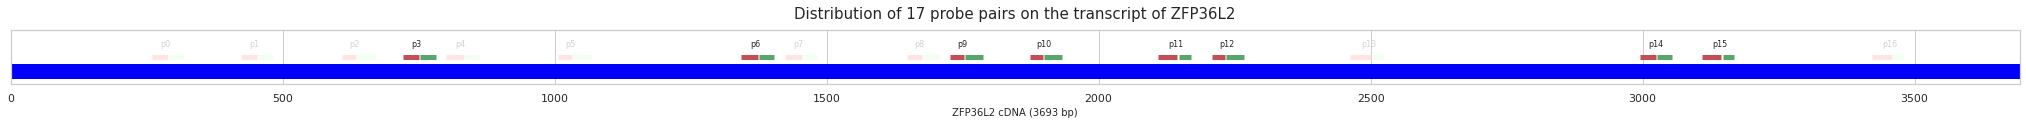

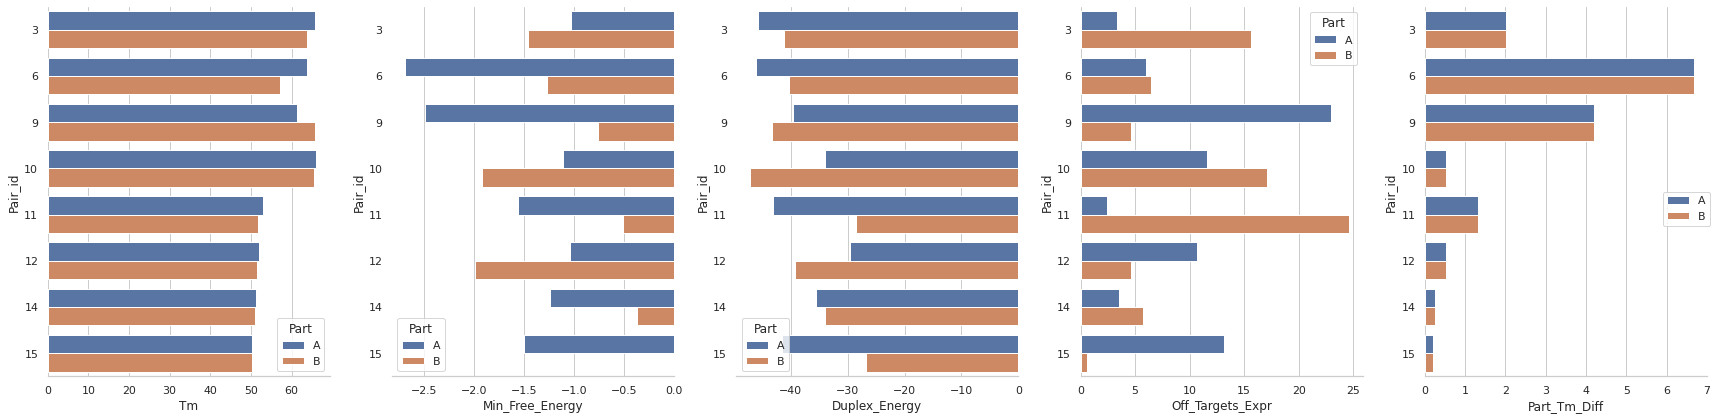

--------------------------------------------------------------------------
DUSP4 - 5553 bp - #pairs:  43
Final score: [27.8  29.   20.6  27.   18.   30.8  28.2  28.   12.6  13.   20.   28.8
 26.6  26.8  23.2  19.4  20.2  18.6  29.8  16.6  19.2  27.6  17.4  27.
 11.8  12.2  12.6  21.8  15.   21.6  21.   24.6  18.8  14.    8.2  13.6
 21.8  14.2  10.   24.8  27.2  23.1  35.86]
Regional top: [8, 19, 24, 34]
Combined top: [ 8 19 24 34 38 25 26  9]


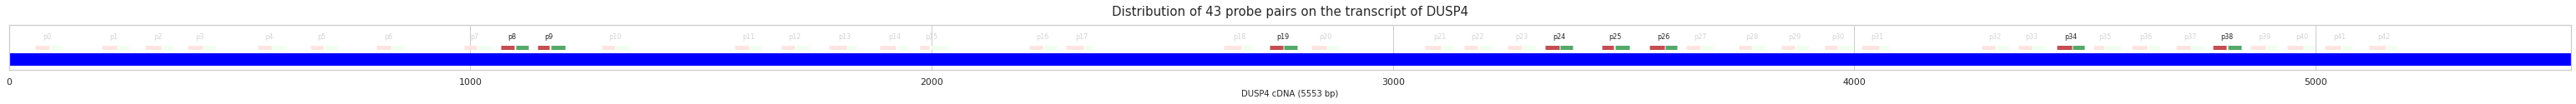

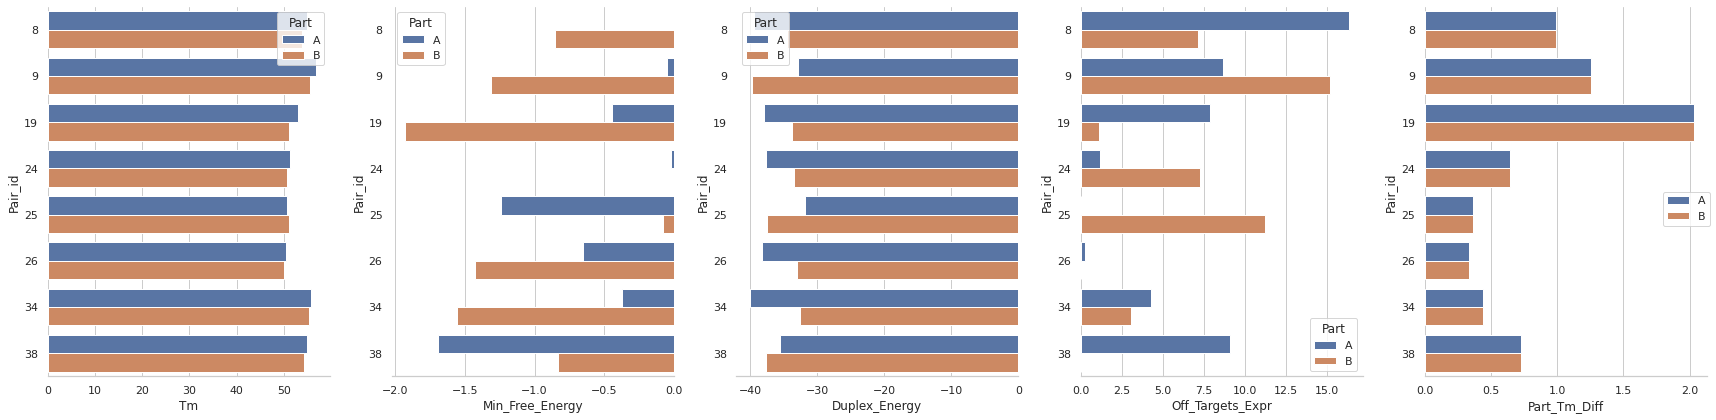

--------------------------------------------------------------------------
HLA-DPB1 - 3991 bp - #pairs:  30
Final score: [17.4  12.6  21.4  19.   12.2  20.4  19.6  14.6  11.6  19.2  13.2  16.4
 17.2  19.6  23.    8.6   8.   17.8   6.8  11.6  15.6  13.8  10.   12.
  6.4  10.4  16.8   9.2  12.76 20.9 ]
Regional top: [8, 10, 18, 24]
Combined top: [ 8 10 18 24 16 15 27 22]


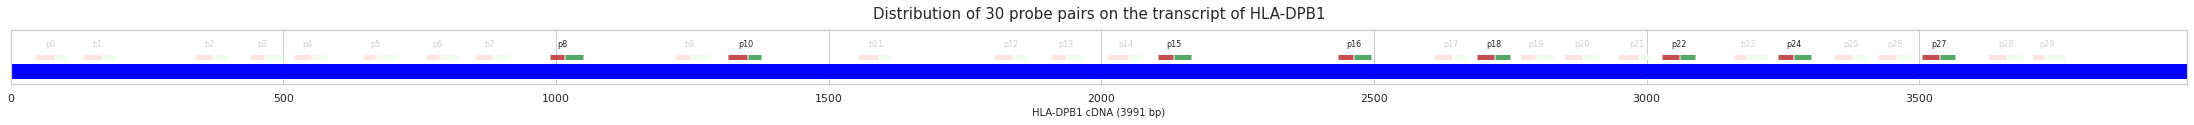

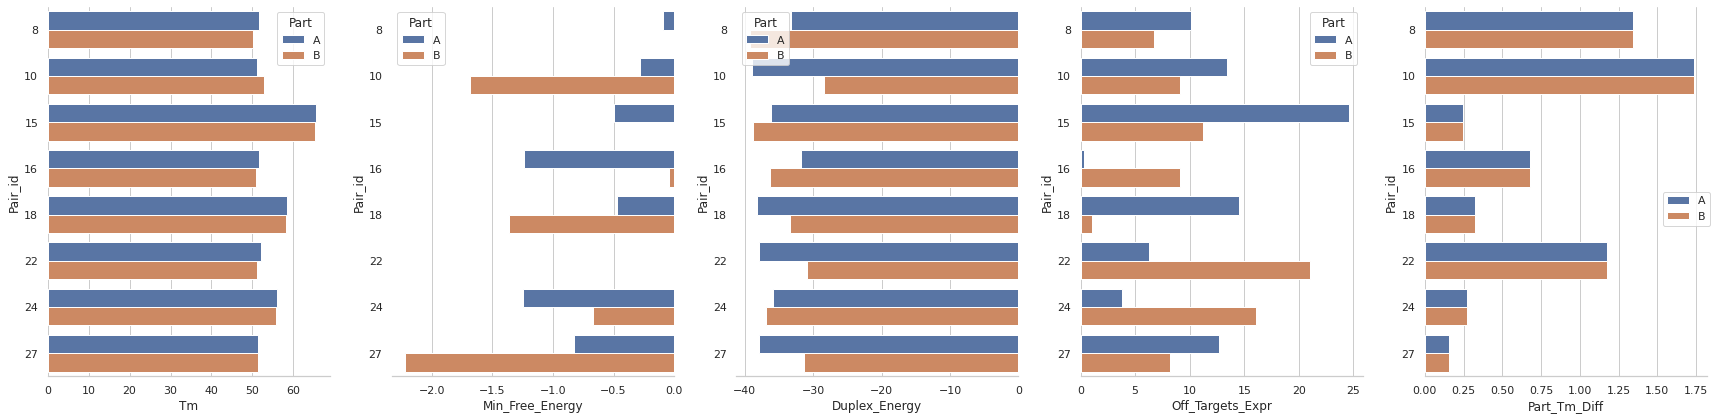

--------------------------------------------------------------------------
LILRB5 - 3236 bp - #pairs:  18
Final score: [15.2  8.4  7.   7.6 12.   7.8  6.4  9.6 12.   4.8 10.  11.4  6.8  7.4
  9.4  4.   8.   5.2]
Regional top: [6, 9, 15]
Combined top: [ 6  9 15 17 12  2 13  3]


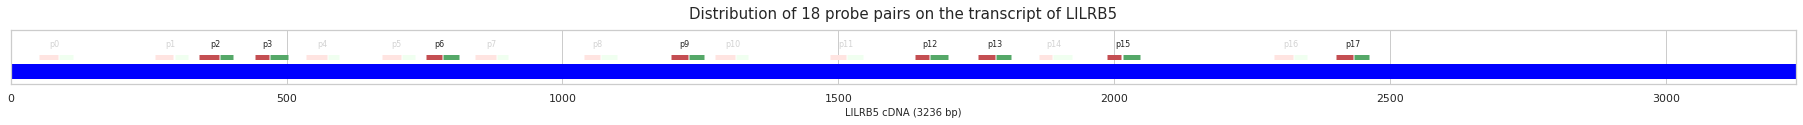

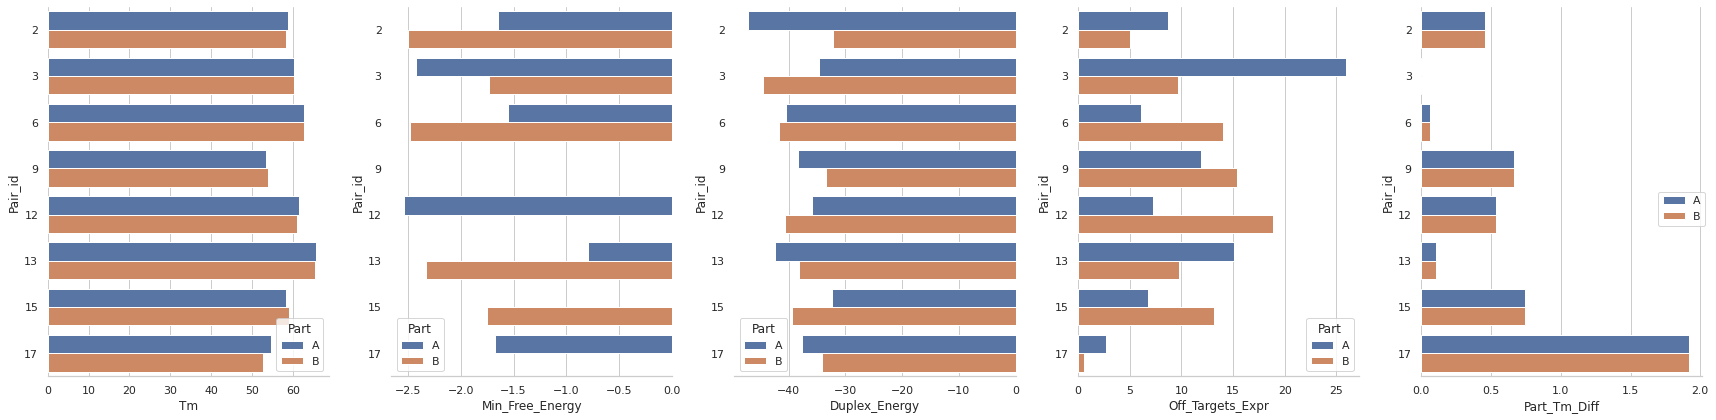

--------------------------------------------------------------------------


In [ ]:
weighted_score_selection(transcript_df,
                         Tm_weight=0.2,
                         hairpin_weight=0.2,
                         duplex_weight=0.2,
                         offtarget_weight=0.2,
                         target_Tm_weight=0.2,
                         target_Tm=60, penalty_3prime=0.1,
                         balanced=True,
                         n_region=4,
                         plot=True,
                         export=False
                        )

# 4. Collect all the selected sequences

Concatenate all the csv with "_selected.csv" suffix

In [ ]:
import os
from datetime import datetime
# datetime object containing current date and time
# dd/mm/YY H:M:S
now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
# Start reading .csv
df_concat = pd.DataFrame()
for file in os.listdir(DATA/"output"):
    if file.endswith("_selected.csv"):
        df_selected = pd.read_csv(DATA/"output"/file, index_col=0)
        gene = file.split("_")[0]
        transcript = file.split("_")[1]
        df_selected.insert(0, "Gene", [gene]*df_selected.shape[0], allow_duplicates=True)
        df_selected.insert(1, "Transcript", [transcript]*df_selected.shape[0], allow_duplicates=True)
        print(file, "--- nrows:", df_selected.shape[0])
        df_concat = pd.concat([df_concat, df_selected], ignore_index=True)
df_concat

FileNotFoundError: ignored

Save the combined dataframe

In [ ]:
# save the combined dataframe
saved_filename = "output/selected_probes_combined_{}_genes_{}.csv".format(len(np.unique(np.array(df_concat.Gene.values))),dt_string)
print("--------------------------------------------------------")
print("File saved:", saved_filename)
df_concat.to_csv(DATA/saved_filename)

--------------------------------------------------------
File saved: output/selected_probes_combined_11_genes_20201120_043241.csv
